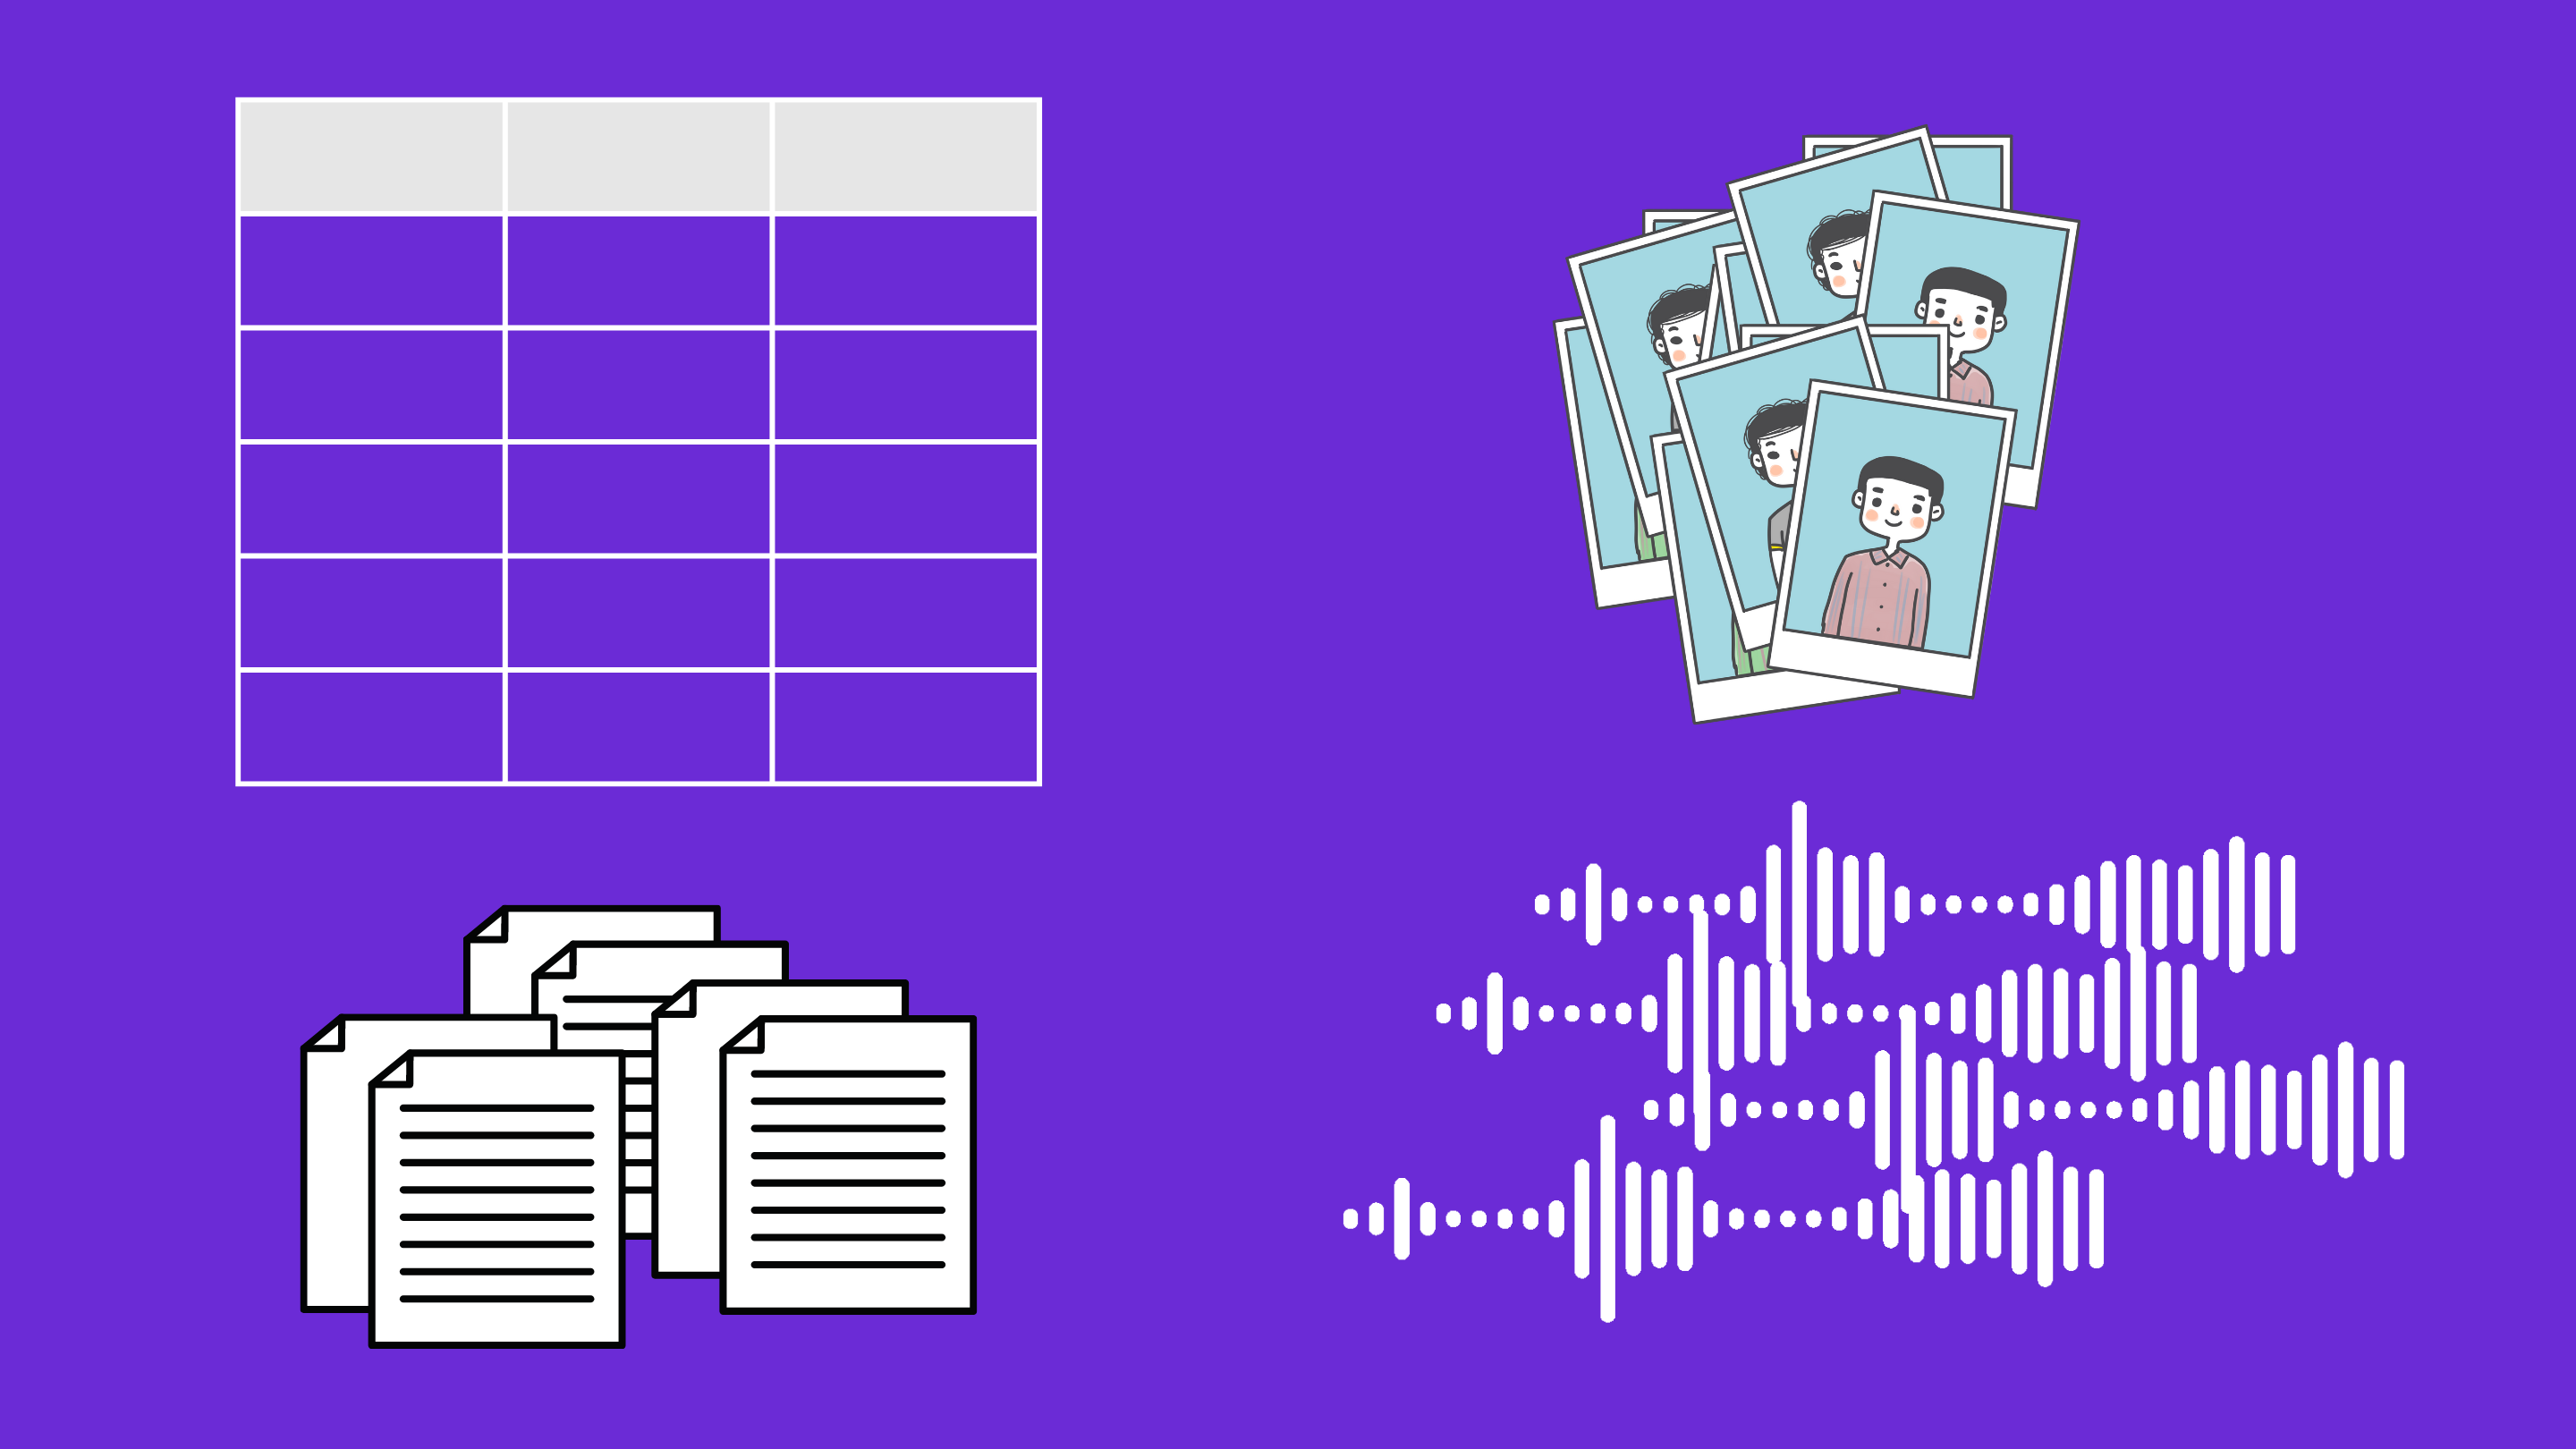

# Take a look at your data

First and foremost, it is important to understand what your data looks like, what kind of columns are involved and how is the data organized.

Some datasets have self explanatory columns but some might have confusing column names or abbreviations. 

## Tip #1 - Make sure to check the dataset documentation to understand the data.

Find the documentation for your dataset online.
* https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=flights.csv
* maybe a PDF

OR

If it is a private dataset, you need to talk to whoever is responsible.


In some cases, if you are working in a company, you might need to interview people responsible for this piece of data to understand:
* how the data was collected
* what potential issues are there in the data
* what each column means
* what does the shorthands/category names stand for

# Importing libraries
In Python, you need to import the libraries you will use on this project before you use them in your code.

How to call the library will change for every library. Check their documentation to find the correct way.

You can also use this cell to set some preferences, like we do here, show all columns and rows of a dataset.

In [50]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [51]:
flights = pd.read_csv(r"D:\Documents\Coding\Python\Files\flights - Copy.csv")


In [52]:
flights.shape

(1048575, 31)

In [53]:
flights.head(10)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   
5  2015      1    1            4      DL            806      N3730B   
6  2015      1    1            4      NK            612      N635NK   
7  2015      1    1            4      US           2013      N584UW   
8  2015      1    1            4      AA           1112      N3LAAA   
9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX                 PBI                   10             2.0   
2            SFO                 CLT                   20            18.0   
3            LAX                 MIA                   20            15.0   
4            SEA                 ANC                   25            24.0   
5            SFO                 MSP                   25            20.0   
6            LAS                 MSP                   25            19.0   
7            LAX                 CLT                   30            44.0   
8            SFO                 DFW                   30            19.0   
9            LAS                 ATL                   30            33.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   
1             -8.0      12.0        14.0           280.0         279.0   
2             -2.0      16.0        34.0           286.0         293.0   
3             -5.0      15.0        30.0           285.0         281.0   
4             -1.0      11.0        35.0           235.0         215.0   
5             -5.0      18.0        38.0           217.0         230.0   
6             -6.0      11.0        30.0           181.0         170.0   
7             14.0      13.0        57.0           273.0         249.0   
8            -11.0      17.0        36.0           195.0         193.0   
9              3.0      12.0        45.0           221.0         203.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   
1     263.0      2330      737.0      4.0                750         741.0   
2     266.0      2296      800.0     11.0                806         811.0   
3     258.0      2342      748.0      8.0                805         756.0   
4     199.0      1448      254.0      5.0                320         259.0   
5     206.0      1589      604.0      6.0                602         610.0   
6     154.0      1299      504.0      5.0                526         509.0   
7     228.0      2125      745.0      8.0                803         753.0   
8     173.0      1464      529.0      3.0                545         532.0   
9     186.0      1747      651.0      5.0                711         656.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                 NaN               NaN   
1           -9.0         0          0                 NaN               NaN   
2            5.0         0          0                 NaN               NaN   
3           -9.0         0          0                 NaN               NaN   
4          -21.0         0          0                 NaN               NaN   
5            8.0         0          0                 NaN               NaN   
6          -17.0         0          0                 NaN               NaN   
7          -10.0         0          0                 NaN          

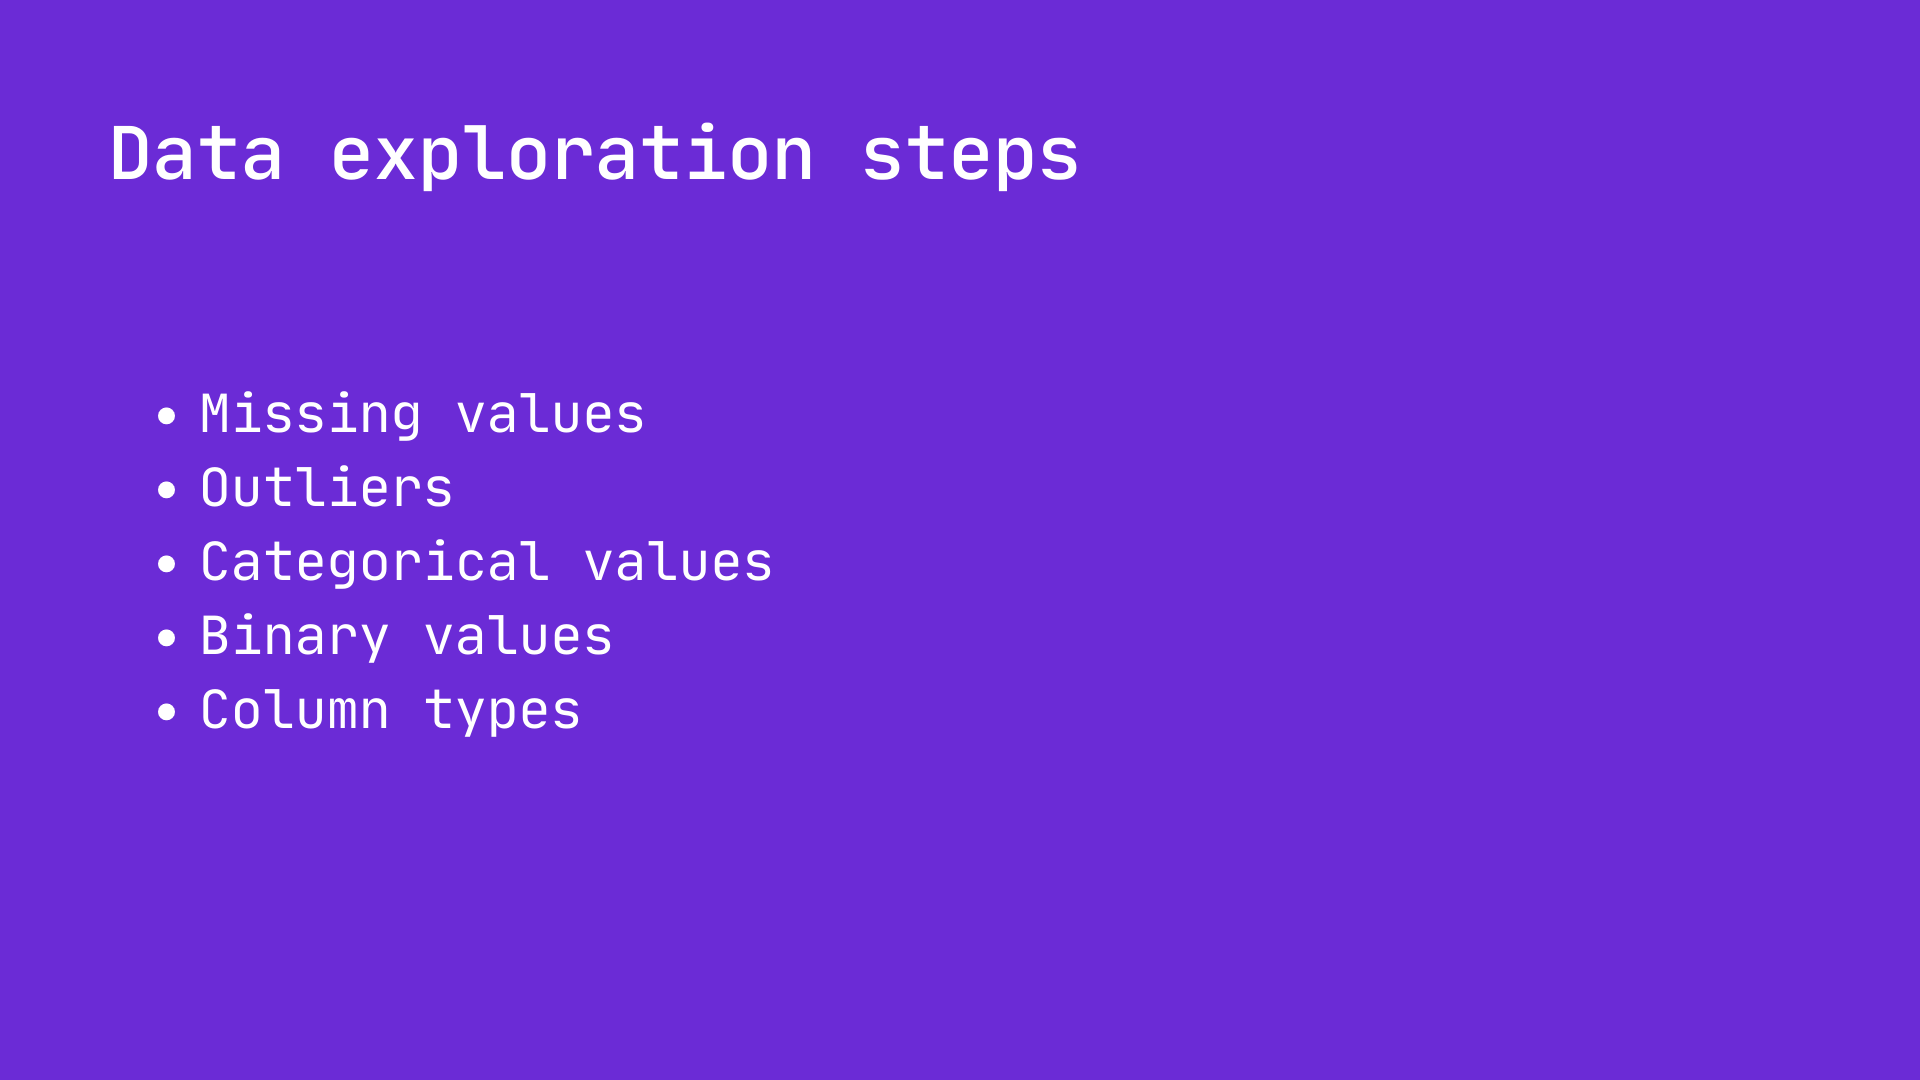

## Things to keep in mind while doing data exploration

* How am I going to clean it?
* What kind of features can I generate?

# Quick cleaning
Many times, when starting a project, you will have an end goal defined. This end goal will determine which column/combination of columns will be your target column.

## Tip #2 - Only keep columns that are helpful for your goal

Target column is what you want to predict for using an ML model.

On top of the target feature, the end model will help you identify redundant columns that you don't need in your analysis.

Before starting with data exploration, it is a good idea to take a look at all the columns with your end goal in mind, and get rid of the ones that you will not use when training your model.

For nowm we will include more than what we need though. Because the extra information will be helpful for data exploration and cleaning.

## Goal: predict the cause of arrival delay

In [54]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [55]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED', 'CANCELLATION_REASON']]

# 'CANCELLED', 'CANCELLATION_REASON'

In [56]:
flights.shape

(1048575, 23)

In [57]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
SCHEDULED_TIME               2
ELAPSED_TIME             43071
ARRIVAL_DELAY            43071
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
CANCELLED                    0
CANCELLATION_REASON    1008048
dtype: int64

In [58]:
flights[flights['ARRIVAL_DELAY'].isna()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
32       2015      1    1            4      AS            136            ANC   
42       2015      1    1            4      AA           2459            PHX   
68       2015      1    1            4      OO           5254            MAF   
82       2015      1    1            4      MQ           2859            SGF   
90       2015      1    1            4      OO           5460            RDD   
...       ...    ...  ...          ...     ...            ...            ...   
1048386  2015      3   10            2      EV           4990            DTW   
1048431  2015      3   10            2      EV           2527            DFW   
1048460  2015      3   10            2      EV           4943            MSP   
1048470  2015      3   10            2      MQ           3672            ORD   
1048574  2015      3   10            2      MQ           2916            CID   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
32                      SEA                  135             NaN   
42                      DFW                  200             NaN   
68                      IAH                  510             NaN   
82                      DFW                  525             NaN   
90                      SFO                  530             NaN   
...                     ...                  ...             ...   
1048386                 ATW                 1000           953.0   
1048431                 MOB                 1005             NaN   
1048460                 CLE                 1005          1029.0   
1048470                 DBQ                 1005             NaN   
1048574                 ORD                 1013             NaN   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
32                   NaN                600           NaN           205.0   
42                   NaN                500           NaN           120.0   
68                   NaN                637           NaN            87.0   
82                   NaN                700           NaN            95.0   
90                   NaN                700           NaN            90.0   
...                  ...                ...           ...             ...   
1048386             -7.0               1026        1204.0            86.0   
1048431              NaN               1135           NaN            90.0   
1048460             24.0               1301           NaN           116.0   
1048470              NaN               1055           NaN            50.0   
1048574              NaN               1115           NaN            62.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
32                NaN            NaN               NaN             NaN   
42                NaN            NaN               NaN             NaN   
68                NaN            NaN               NaN             NaN   
82                NaN            NaN               NaN             NaN   
90                NaN            NaN               NaN             NaN   
...               ...            ...               ...             ...   
1048386           NaN            NaN               NaN             NaN   
1048431           NaN            NaN               NaN             NaN   
1048460           NaN            NaN               NaN             NaN   
1048470           NaN            NaN               NaN             NaN   
1048574           NaN            NaN               NaN             NaN   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
32                 NaN                  NaN            NaN          1   
42                 NaN                  NaN            NaN          1   
68                 NaN                  NaN            NaN          1   
82                 NaN                  NaN            NaN          1   
90                 NaN                  NaN         

In [59]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape

(820047, 23)

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>, <Axes: >]], dtype=object)

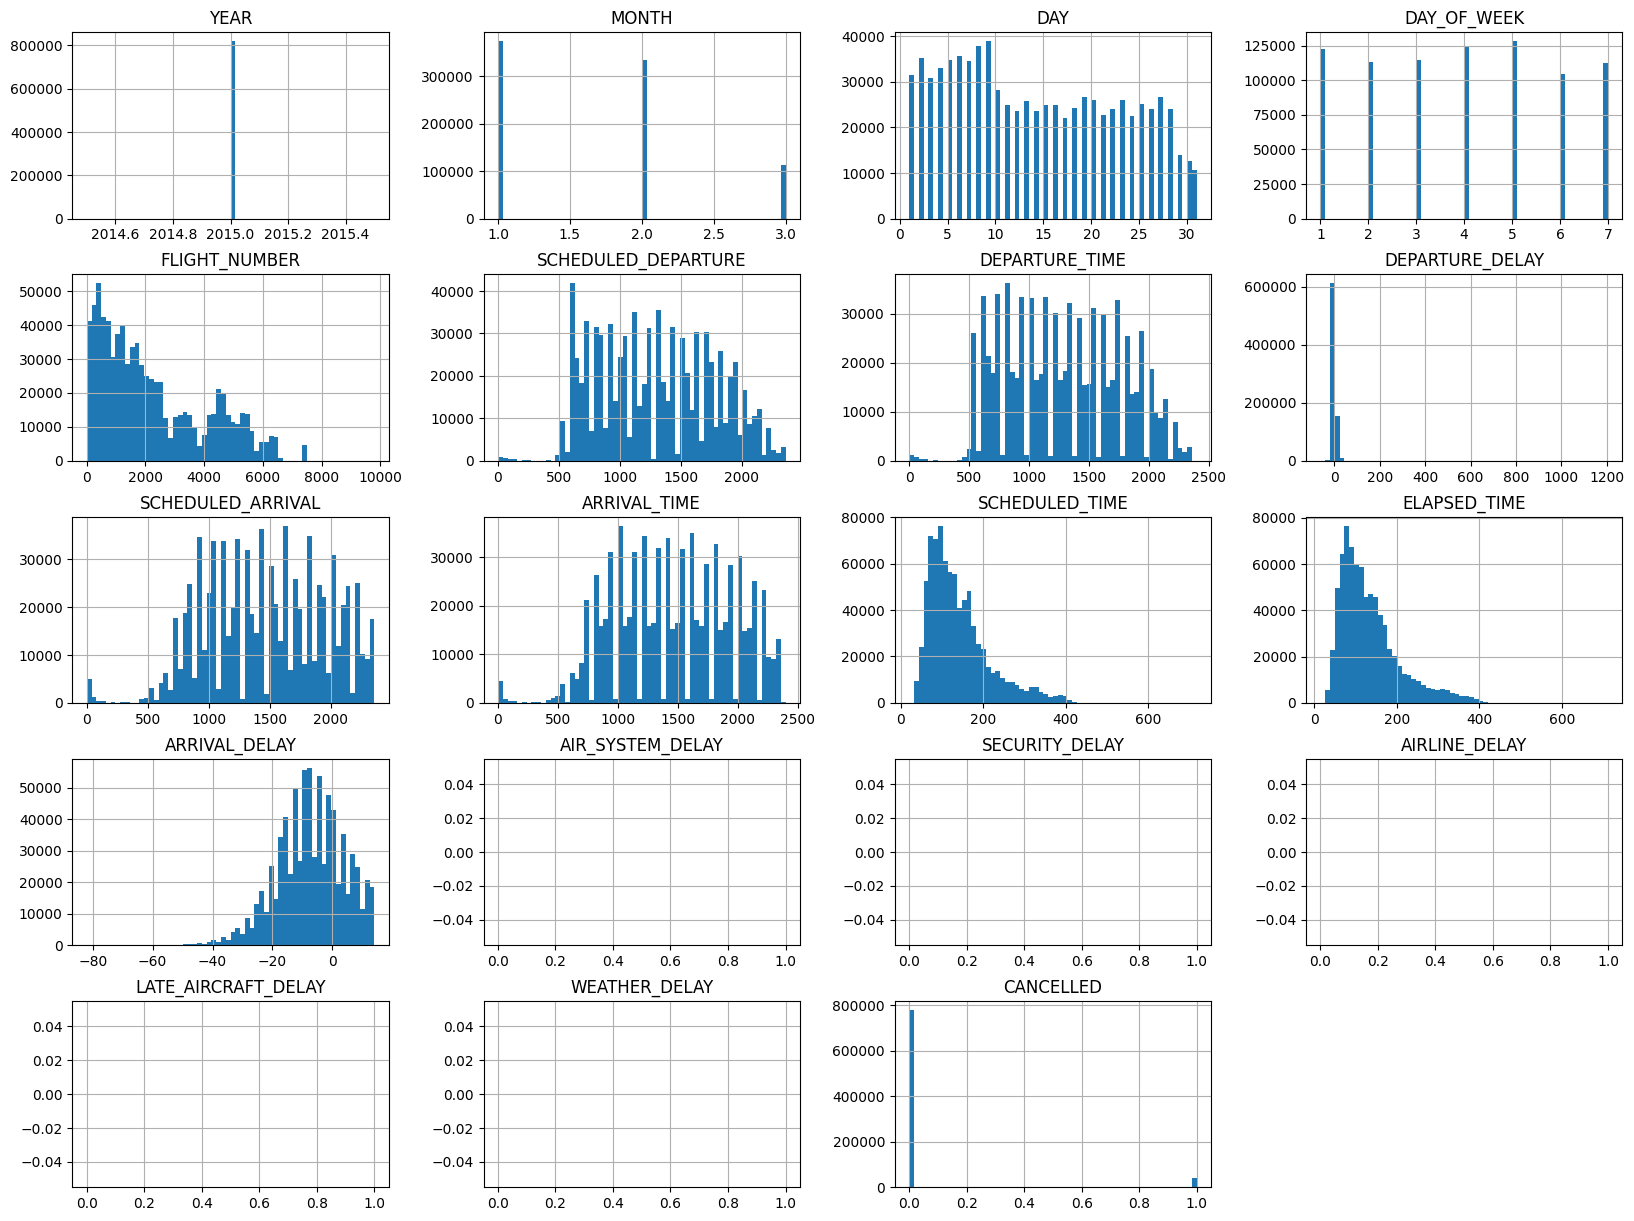

In [60]:
na_values.hist(bins=60, figsize=(20,15))

In [61]:
na_values[na_values['ARRIVAL_DELAY']>13]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
94       2015      1    1            4      UA           1012            IAD   
109      2015      1    1            4      EV           3268            ATL   
181      2015      1    1            4      UA            422            RNO   
204      2015      1    1            4      AA            196            MIA   
490      2015      1    1            4      F9            582            SLC   
...       ...    ...  ...          ...     ...            ...            ...   
1047612  2015      3   10            2      OO           2875            LAX   
1047794  2015      3   10            2      WN           3757            MCO   
1047960  2015      3   10            2      B6           2169            BOS   
1048415  2015      3   10            2      AA            160            BOS   
1048472  2015      3   10            2      OO           5657            DEN   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
94                      IAH                  535           541.0   
109                     IAD                  540           556.0   
181                     DEN                  600           557.0   
204                     PHL                  600           604.0   
490                     DEN                  615           617.0   
...                     ...                  ...             ...   
1047612                 ABQ                  912           908.0   
1047794                 BUF                  925           957.0   
1047960                 FLL                  938           950.0   
1048415                 ORD                 1005          1001.0   
1048472                 SGF                 1005          1011.0   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
94                   6.0                802         816.0           207.0   
109                 16.0                725         739.0           105.0   
181                 -3.0                910         924.0           130.0   
204                  4.0                844         858.0           164.0   
490                  2.0                747         801.0            92.0   
...                  ...                ...           ...             ...   
1047612             -4.0               1206        1220.0           114.0   
1047794             32.0               1200        1214.0           155.0   
1047960             12.0               1309        1323.0           211.0   
1048415             -4.0               1158        1212.0           173.0   
1048472              6.0               1252        1306.0           107.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
94              215.0           14.0               NaN             NaN   
109             103.0           14.0               NaN             NaN   
181             147.0           14.0               NaN             NaN   
204             174.0           14.0               NaN             NaN   
490             104.0           14.0               NaN             NaN   
...               ...            ...               ...             ...   
1047612         132.0           14.0               NaN             NaN   
1047794         137.0           14.0               NaN             NaN   
1047960         213.0           14.0               NaN             NaN   
1048415         191.0           14.0               NaN             NaN   
1048472         115.0           14.0               NaN             NaN   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
94                 NaN                  NaN            NaN          0   
109                NaN                  NaN            NaN          0   
181                NaN                  NaN            NaN          0   
204                NaN                  NaN            NaN          0   
490                NaN                  NaN         

In [62]:
non_na_values = flights[~flights['AIR_SYSTEM_DELAY'].isna()]
non_na_values.shape


(228528, 23)

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>, <Axes: >]], dtype=object)

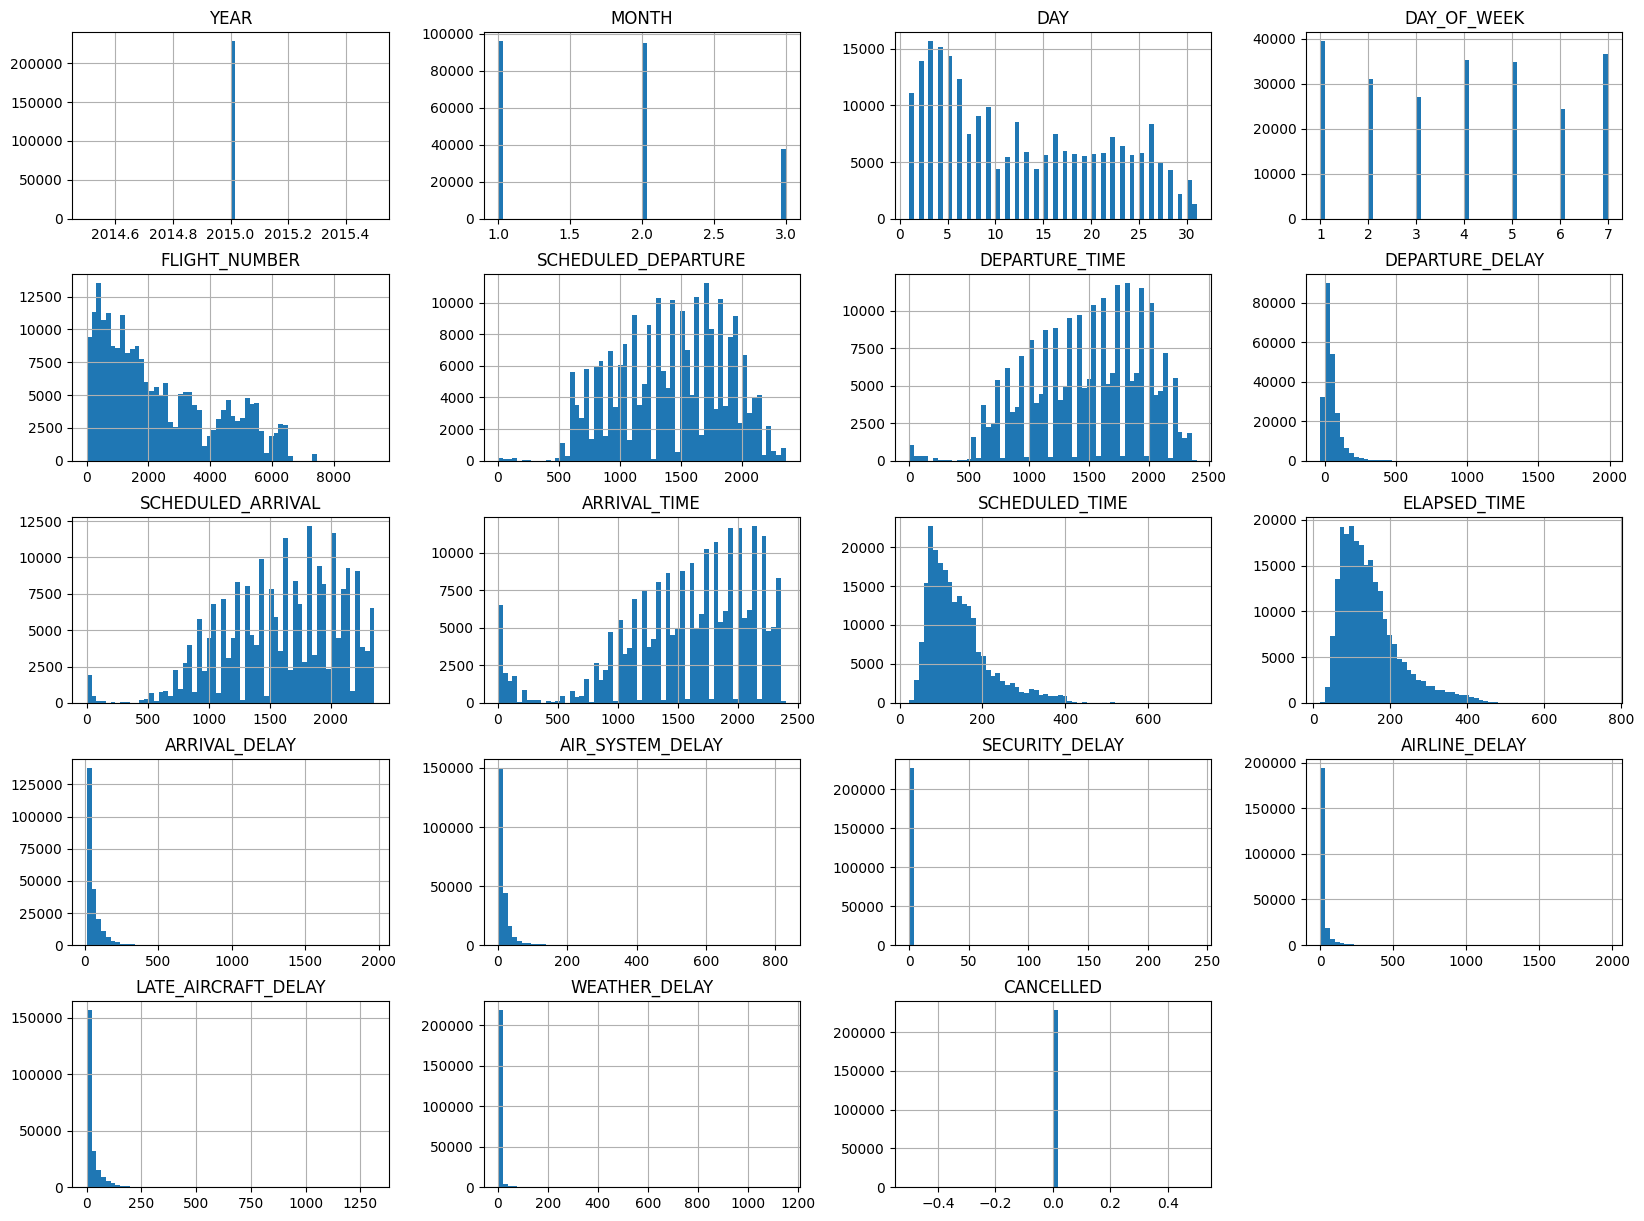

In [63]:
non_na_values.hist(bins=60, figsize=(20,15))

In [64]:
late_flights = flights[flights['ARRIVAL_DELAY']<15]
late_flights.shape

(776976, 23)

In [65]:
late_flights.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
SCHEDULED_TIME              0
ELAPSED_TIME                0
ARRIVAL_DELAY               0
AIR_SYSTEM_DELAY       776976
SECURITY_DELAY         776976
AIRLINE_DELAY          776976
LATE_AIRCRAFT_DELAY    776976
WEATHER_DELAY          776976
CANCELLED                   0
CANCELLATION_REASON    776976
dtype: int64

Observation: We assume only flights that are later than 15 mins to arrive to be late.

What about the missing values for ARRIVAL_DELAY?

In [66]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
32       2015      1    1            4      AS            136            ANC   
42       2015      1    1            4      AA           2459            PHX   
68       2015      1    1            4      OO           5254            MAF   
82       2015      1    1            4      MQ           2859            SGF   
90       2015      1    1            4      OO           5460            RDD   
...       ...    ...  ...          ...     ...            ...            ...   
1048386  2015      3   10            2      EV           4990            DTW   
1048431  2015      3   10            2      EV           2527            DFW   
1048460  2015      3   10            2      EV           4943            MSP   
1048470  2015      3   10            2      MQ           3672            ORD   
1048574  2015      3   10            2      MQ           2916            CID   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
32                      SEA                  135             NaN   
42                      DFW                  200             NaN   
68                      IAH                  510             NaN   
82                      DFW                  525             NaN   
90                      SFO                  530             NaN   
...                     ...                  ...             ...   
1048386                 ATW                 1000           953.0   
1048431                 MOB                 1005             NaN   
1048460                 CLE                 1005          1029.0   
1048470                 DBQ                 1005             NaN   
1048574                 ORD                 1013             NaN   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
32                   NaN                600           NaN           205.0   
42                   NaN                500           NaN           120.0   
68                   NaN                637           NaN            87.0   
82                   NaN                700           NaN            95.0   
90                   NaN                700           NaN            90.0   
...                  ...                ...           ...             ...   
1048386             -7.0               1026        1204.0            86.0   
1048431              NaN               1135           NaN            90.0   
1048460             24.0               1301           NaN           116.0   
1048470              NaN               1055           NaN            50.0   
1048574              NaN               1115           NaN            62.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
32                NaN            NaN               NaN             NaN   
42                NaN            NaN               NaN             NaN   
68                NaN            NaN               NaN             NaN   
82                NaN            NaN               NaN             NaN   
90                NaN            NaN               NaN             NaN   
...               ...            ...               ...             ...   
1048386           NaN            NaN               NaN             NaN   
1048431           NaN            NaN               NaN             NaN   
1048460           NaN            NaN               NaN             NaN   
1048470           NaN            NaN               NaN             NaN   
1048574           NaN            NaN               NaN             NaN   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
32                 NaN                  NaN            NaN          1   
42                 NaN                  NaN            NaN          1   
68                 NaN                  NaN            NaN          1   
82                 NaN                  NaN            NaN          1   
90                 NaN                  NaN         

In [67]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    40527
0     2544
Name: count, dtype: int64

In [68]:
arrival_na_not_cancelled = arrival_na[arrival_na['CANCELLED']==0]
arrival_na_not_cancelled

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
724      2015      1    1            4      DL            716            OMA   
1455     2015      1    1            4      OO           5237            MKE   
2218     2015      1    1            4      WN           1966            ATL   
2526     2015      1    1            4      EV           4555            IAH   
2866     2015      1    1            4      WN           1081            MDW   
...       ...    ...  ...          ...     ...            ...            ...   
1045541  2015      3   10            2      OO           5441            SFO   
1047083  2015      3   10            2      EV           3950            ORD   
1047415  2015      3   10            2      EV           4591            IAH   
1047945  2015      3   10            2      HA             47            OAK   
1048386  2015      3   10            2      EV           4990            DTW   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
724                     ATL                  645           637.0   
1455                    IAH                  745           742.0   
2218                    JAX                  845           922.0   
2526                    HRL                  902           859.0   
2866                    OKC                  930           926.0   
...                     ...                  ...             ...   
1045541                 SBP                  714           713.0   
1047083                 GRB                  845           839.0   
1047415                 LRD                  900           854.0   
1047945                 HNL                  935           928.0   
1048386                 ATW                 1000           953.0   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
724                 -8.0               1009        1451.0           144.0   
1455                -3.0               1041        1505.0           176.0   
2218                37.0               1000        1219.0            75.0   
2526                -3.0               1017        1319.0            75.0   
2866                -4.0               1135        1343.0           125.0   
...                  ...                ...           ...             ...   
1045541             -1.0                821        1101.0            67.0   
1047083             -6.0                945        1109.0            60.0   
1047415             -6.0               1015        1154.0            75.0   
1047945             -7.0               1215        1744.0           340.0   
1048386             -7.0               1026        1204.0            86.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
724               NaN            NaN               NaN             NaN   
1455              NaN            NaN               NaN             NaN   
2218              NaN            NaN               NaN             NaN   
2526              NaN            NaN               NaN             NaN   
2866              NaN            NaN               NaN             NaN   
...               ...            ...               ...             ...   
1045541           NaN            NaN               NaN             NaN   
1047083           NaN            NaN               NaN             NaN   
1047415           NaN            NaN               NaN             NaN   
1047945           NaN            NaN               NaN             NaN   
1048386           NaN            NaN               NaN             NaN   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
724                NaN                  NaN            NaN          0   
1455               NaN                  NaN            NaN          0   
2218               NaN                  NaN            NaN          0   
2526               NaN                  NaN            NaN          0   
2866               NaN                  NaN         

We can calculate the arrival_delay but we do not know what the reason for the delay is.
The missing information is only 2%.

In [69]:
arrival_na_not_cancelled[arrival_na_not_cancelled['ARRIVAL_TIME'].isna()].shape


(769, 23)

## Tip #3 - as you do exploration, note down what actions to take for cleaning

# Steps to take

1. Remove rows where the arrival delay is missing (most of them are cancelled flights)
2. Fill in nan values for delay reasons with zeros

In [70]:
flights.shape

(1048575, 23)

In [71]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights.shape

(1005504, 23)

In [72]:
flights[flights['SCHEDULED_TIME'].isna()]

Empty DataFrame
Columns: [YEAR, MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, SCHEDULED_ARRIVAL, ARRIVAL_TIME, SCHEDULED_TIME, ELAPSED_TIME, ARRIVAL_DELAY, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY, CANCELLED, CANCELLATION_REASON]
Index: []

In [73]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY        776976
SECURITY_DELAY          776976
AIRLINE_DELAY           776976
LATE_AIRCRAFT_DELAY     776976
WEATHER_DELAY           776976
CANCELLED                    0
CANCELLATION_REASON    1005504
dtype: int64

In [74]:
flights.head(10)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4      AS             98            ANC   
1  2015      1    1            4      AA           2336            LAX   
2  2015      1    1            4      US            840            SFO   
3  2015      1    1            4      AA            258            LAX   
4  2015      1    1            4      AS            135            SEA   
5  2015      1    1            4      DL            806            SFO   
6  2015      1    1            4      NK            612            LAS   
7  2015      1    1            4      US           2013            LAX   
8  2015      1    1            4      AA           1112            SFO   
9  2015      1    1            4      DL           1173            LAS   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
0                 SEA                    5          2354.0            -11.0   
1                 PBI                   10             2.0             -8.0   
2                 CLT                   20            18.0             -2.0   
3                 MIA                   20            15.0             -5.0   
4                 ANC                   25            24.0             -1.0   
5                 MSP                   25            20.0             -5.0   
6                 MSP                   25            19.0             -6.0   
7                 CLT                   30            44.0             14.0   
8                 DFW                   30            19.0            -11.0   
9                 ATL                   30            33.0              3.0   

   SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  ELAPSED_TIME  \
0                430         408.0           205.0         194.0   
1                750         741.0           280.0         279.0   
2                806         811.0           286.0         293.0   
3                805         756.0           285.0         281.0   
4                320         259.0           235.0         215.0   
5                602         610.0           217.0         230.0   
6                526         509.0           181.0         170.0   
7                803         753.0           273.0         249.0   
8                545         532.0           195.0         193.0   
9                711         656.0           221.0         203.0   

   ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          -22.0               NaN             NaN            NaN   
1           -9.0               NaN             NaN            NaN   
2            5.0               NaN             NaN            NaN   
3           -9.0               NaN             NaN            NaN   
4          -21.0               NaN             NaN            NaN   
5            8.0               NaN             NaN            NaN   
6          -17.0               NaN             NaN            NaN   
7          -10.0               NaN             NaN            NaN   
8          -13.0               NaN             NaN            NaN   
9          -15.0               NaN             NaN            NaN   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED CANCELLATION_REASON  
0                  NaN            NaN          0                 NaN  
1                  NaN            NaN          0                 NaN  
2                  NaN            NaN          0                 NaN  
3                  NaN            NaN          0                 NaN  
4                  NaN            NaN          0                 NaN  
5                  NaN            NaN          0                 NaN  
6                  NaN            NaN          0                 NaN  
7                  NaN            NaN          0                 NaN  
8                  NaN            NaN          0                 NaN  
9                  NaN            NaN          0                 NaN

In [75]:
flights = flights.fillna(0)

C:\Users\dipan\AppData\Local\Temp\ipykernel_9848\3873660369.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flights = flights.fillna(0)


In [76]:
flights.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
SCHEDULED_TIME         0
ELAPSED_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

In [77]:
flights.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4      AS             98            ANC   
1  2015      1    1            4      AA           2336            LAX   
2  2015      1    1            4      US            840            SFO   
3  2015      1    1            4      AA            258            LAX   
4  2015      1    1            4      AS            135            SEA   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
0                 SEA                    5          2354.0            -11.0   
1                 PBI                   10             2.0             -8.0   
2                 CLT                   20            18.0             -2.0   
3                 MIA                   20            15.0             -5.0   
4                 ANC                   25            24.0             -1.0   

   SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  ELAPSED_TIME  \
0                430         408.0           205.0         194.0   
1                750         741.0           280.0         279.0   
2                806         811.0           286.0         293.0   
3                805         756.0           285.0         281.0   
4                320         259.0           235.0         215.0   

   ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          -22.0               0.0             0.0            0.0   
1           -9.0               0.0             0.0            0.0   
2            5.0               0.0             0.0            0.0   
3           -9.0               0.0             0.0            0.0   
4          -21.0               0.0             0.0            0.0   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  CANCELLATION_REASON  
0                  0.0            0.0          0                    0  
1                  0.0            0.0          0                    0  
2                  0.0            0.0          0                    0  
3                  0.0            0.0          0                    0  
4                  0.0            0.0          0                    0

In [78]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON      int64
dtype: object

In [79]:
# flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
#        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
#        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].apply(pd.to_numeric)

In [80]:
# flights.dtypes

# Data exploration
One of the most fun parts of data preparation is visualizing the data to find imperfections. 

## Tip #4 - Visualize your data to explore it

Histograms are a great way to take a first look at your data.

A histogram will show the amount of times (y-axis) a certain value (x-axis) has occurred in the data. The span of the x-axis includes all the values. So when you see a histogram where, seemingly, only one value (e.g. 0) is represented, yet the x-axis spans until 100, this means there are some values that are around 100. Only that their occurrence is so low that in the graph they are invisible.

This might point to some outliers and tells us that we need to take a closer look at these columns.

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>],
       [<Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>],
       [<Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'CANCE

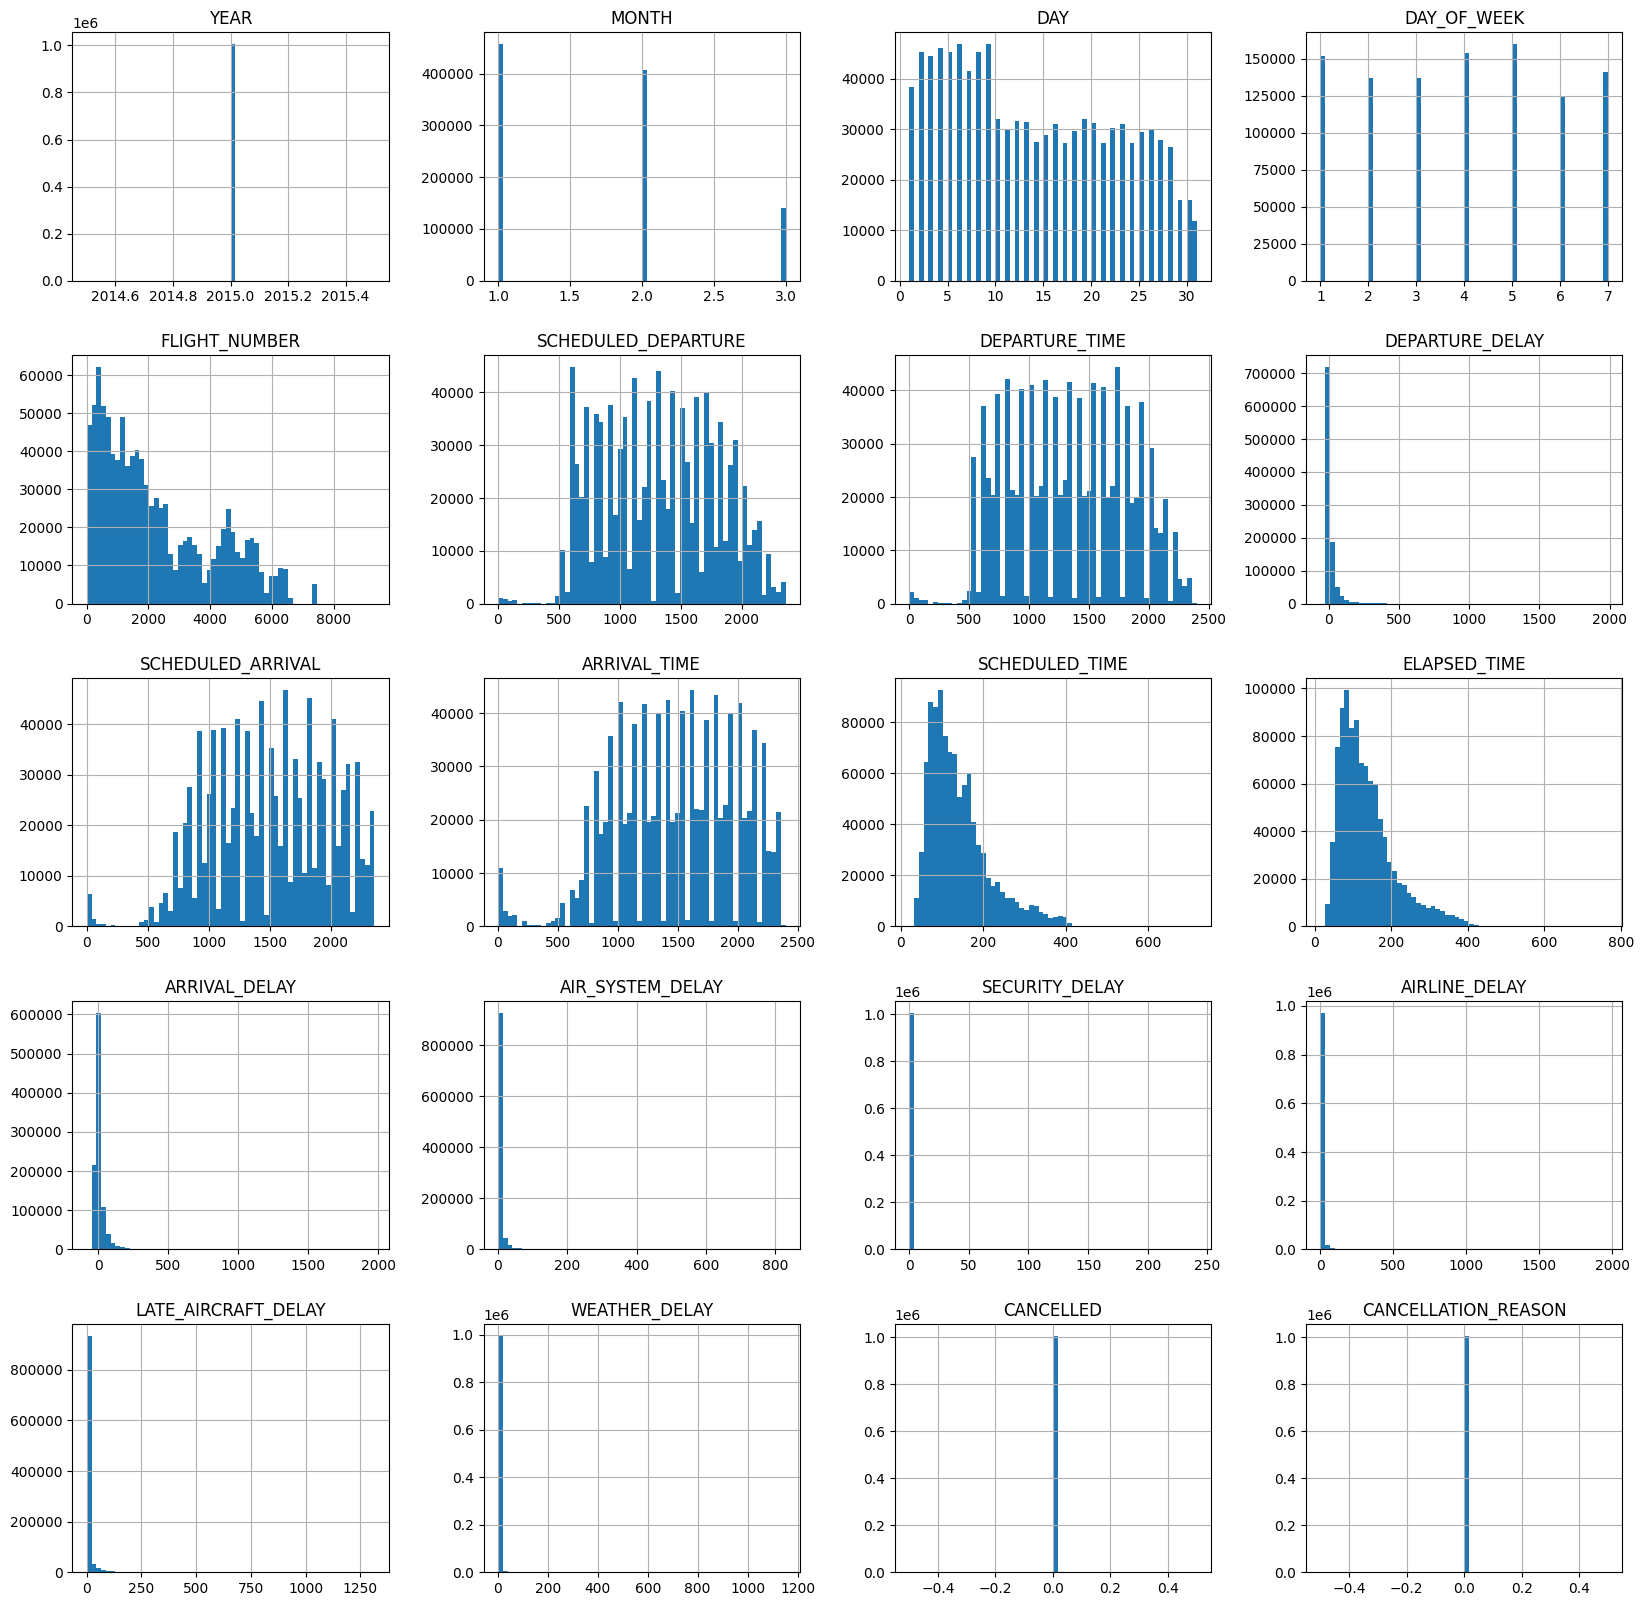

In [81]:
flights.hist(bins=60, figsize=(20,20))

In [82]:
flights[flights['ARRIVAL_DELAY']>1500]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
264495   2015      1   18            7      AA            224            LAS   
337720   2015      1   23            5      AA           1322            BHM   
396544   2015      1   27            2      AA           1242            FAT   
886984   2015      2   28            6      AA           1312            STL   
949876   2015      3    4            3      AA            270            HNL   
1047179  2015      3   10            2      AA           1594            SAT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
264495                  LAX                 1130          1414.0   
337720                  DFW                  700          1608.0   
396544                  DFW                  659           850.0   
886984                  MIA                  620           847.0   
949876                  LAX                  828          1057.0   
1047179                 DFW                  850          1047.0   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
264495            1604.0               1246        1519.0            76.0   
337720            1988.0                914        1805.0           134.0   
396544            1551.0               1210        1356.0           191.0   
886984            1587.0               1008        1315.0           168.0   
949876            1589.0               1555        1811.0           327.0   
1047179           1557.0               1000        1154.0            70.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
264495           65.0         1593.0               0.0             0.0   
337720          117.0         1971.0               0.0             0.0   
396544          186.0         1546.0               0.0             0.0   
886984          208.0         1627.0              40.0             0.0   
949876          314.0         1576.0               0.0             0.0   
1047179          67.0         1554.0               0.0             0.0   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
264495          1593.0                  0.0            0.0          0   
337720          1971.0                  0.0            0.0          0   
396544          1546.0                  0.0            0.0          0   
886984          1587.0                  0.0            0.0          0   
949876          1576.0                  0.0            0.0          0   
1047179         1554.0                  0.0            0.0          0   

         CANCELLATION_REASON  
264495                     0  
337720                     0  
396544                     0  
886984                     0  
949876                     0  
1047179                    0

In [83]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON      int64
dtype: object

Sometimes there are problems with the data we might not see. One way to figure it out is to look at the types of the columns. If we know a column should be float but it is specific as object (aka string), it is an indication that there is something wrong with it.

Let's see what exactly is wrong by trying to convert it to a numeric column.

In [84]:
flights['SECURITY_DELAY'] = pd.to_numeric(flights['SECURITY_DELAY'])

In [85]:
flights.iloc[2973]

YEAR                     2015
MONTH                       1
DAY                         1
DAY_OF_WEEK                 4
AIRLINE                    AA
FLIGHT_NUMBER            1698
ORIGIN_AIRPORT            SJU
DESTINATION_AIRPORT       DFW
SCHEDULED_DEPARTURE       950
DEPARTURE_TIME          940.0
DEPARTURE_DELAY         -10.0
SCHEDULED_ARRIVAL        1310
ARRIVAL_TIME           1300.0
SCHEDULED_TIME          320.0
ELAPSED_TIME            320.0
ARRIVAL_DELAY           -10.0
AIR_SYSTEM_DELAY          0.0
SECURITY_DELAY            0.0
AIRLINE_DELAY             0.0
LATE_AIRCRAFT_DELAY       0.0
WEATHER_DELAY             0.0
CANCELLED                   0
CANCELLATION_REASON         0
Name: 3164, dtype: object

Here we are making sure that the airline and flight number columns have a good distribution. If only a couple of airlines/flight numbers are represented heavily in the data and other not many times, it will not serve us well to include this information in the model training.

It is also good to take a look at the distribution of categorical values to make sure there aren't any values that look like they don't belong.

## Tip #5 - make sure categorical values are clean


We don't need to include the flight number because it is represented with: airline name, rotue and time of flight.

<Axes: xlabel='AIRLINE'>

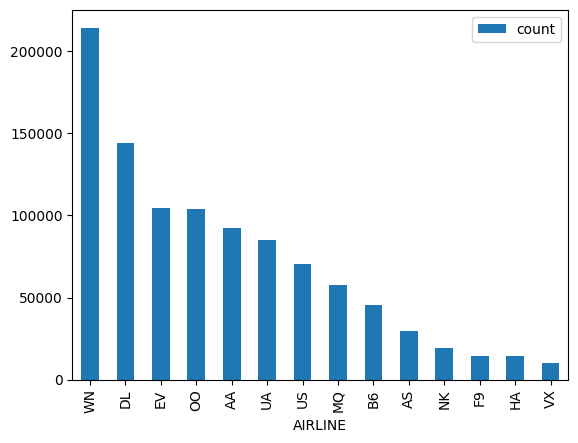

In [86]:
pd.DataFrame(flights.value_counts("AIRLINE")).plot(kind='bar')

# Preparing the target feature

Sometimes, based on our end-goal, we need to combine multiple columns to create the target feature. For this problem we are looking for the type of delay that caused the main delay for this flight.

This way, we are setting up this problem as a classification problem.

In [87]:
flights['all_delay'] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0        2015      1    1            4      AS             98            ANC   
1        2015      1    1            4      AA           2336            LAX   
2        2015      1    1            4      US            840            SFO   
3        2015      1    1            4      AA            258            LAX   
4        2015      1    1            4      AS            135            SEA   
...       ...    ...  ...          ...     ...            ...            ...   
1048569  2015      3   10            2      DL           1546            PHX   
1048570  2015      3   10            2      EV           4122            RDU   
1048571  2015      3   10            2      UA           1018            LGA   
1048572  2015      3   10            2      UA           1260            SAN   
1048573  2015      3   10            2      EV           4349            MSY   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0                       SEA                    5          2354.0   
1                       PBI                   10             2.0   
2                       CLT                   20            18.0   
3                       MIA                   20            15.0   
4                       ANC                   25            24.0   
...                     ...                  ...             ...   
1048569                 ATL                 1013          1045.0   
1048570                 EWR                 1013          1005.0   
1048571                 IAH                 1013          1005.0   
1048572                 ORD                 1013          1010.0   
1048573                 ORD                 1013          1003.0   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
0                  -11.0                430         408.0           205.0   
1                   -8.0                750         741.0           280.0   
2                   -2.0                806         811.0           286.0   
3                   -5.0                805         756.0           285.0   
4                   -1.0                320         259.0           235.0   
...                  ...                ...           ...             ...   
1048569             32.0               1650        1709.0           217.0   
1048570             -8.0               1149        1133.0            96.0   
1048571             -8.0               1337        1335.0           264.0   
1048572             -3.0               1624        1627.0           251.0   
1048573            -10.0               1242        1229.0           149.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0               194.0          -22.0               0.0             0.0   
1               279.0           -9.0               0.0             0.0   
2               293.0            5.0               0.0             0.0   
3               281.0           -9.0               0.0             0.0   
4               215.0          -21.0               0.0             0.0   
...               ...            ...               ...             ...   
1048569         204.0           19.0               0.0             0.0   
1048570          88.0          -16.0               0.0             0.0   
1048571         270.0           -2.0               0.0             0.0   
1048572         257.0            3.0               0.0             0.0   
1048573         146.0          -13.0               0.0             0.0   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
0                  0.0                  0.0            0.0          0   
1                  0.0                  0.0            0.0          0   
2                  0.0                  0.0            0.0          0   
3                  0.0                  0.0            0.0          0   
4                  0.0                  0.0         

In [88]:
flights['delay_reason'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1), 'NO_DELAY')

It's always a good idea to check your data after making big changes to make sure everything went well.

In [89]:
flights

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0        2015      1    1            4      AS             98            ANC   
1        2015      1    1            4      AA           2336            LAX   
2        2015      1    1            4      US            840            SFO   
3        2015      1    1            4      AA            258            LAX   
4        2015      1    1            4      AS            135            SEA   
...       ...    ...  ...          ...     ...            ...            ...   
1048569  2015      3   10            2      DL           1546            PHX   
1048570  2015      3   10            2      EV           4122            RDU   
1048571  2015      3   10            2      UA           1018            LGA   
1048572  2015      3   10            2      UA           1260            SAN   
1048573  2015      3   10            2      EV           4349            MSY   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0                       SEA                    5          2354.0   
1                       PBI                   10             2.0   
2                       CLT                   20            18.0   
3                       MIA                   20            15.0   
4                       ANC                   25            24.0   
...                     ...                  ...             ...   
1048569                 ATL                 1013          1045.0   
1048570                 EWR                 1013          1005.0   
1048571                 IAH                 1013          1005.0   
1048572                 ORD                 1013          1010.0   
1048573                 ORD                 1013          1003.0   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
0                  -11.0                430         408.0           205.0   
1                   -8.0                750         741.0           280.0   
2                   -2.0                806         811.0           286.0   
3                   -5.0                805         756.0           285.0   
4                   -1.0                320         259.0           235.0   
...                  ...                ...           ...             ...   
1048569             32.0               1650        1709.0           217.0   
1048570             -8.0               1149        1133.0            96.0   
1048571             -8.0               1337        1335.0           264.0   
1048572             -3.0               1624        1627.0           251.0   
1048573            -10.0               1242        1229.0           149.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0               194.0          -22.0               0.0             0.0   
1               279.0           -9.0               0.0             0.0   
2               293.0            5.0               0.0             0.0   
3               281.0           -9.0               0.0             0.0   
4               215.0          -21.0               0.0             0.0   
...               ...            ...               ...             ...   
1048569         204.0           19.0               0.0             0.0   
1048570          88.0          -16.0               0.0             0.0   
1048571         270.0           -2.0               0.0             0.0   
1048572         257.0            3.0               0.0             0.0   
1048573         146.0          -13.0               0.0             0.0   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
0                  0.0                  0.0            0.0          0   
1                  0.0                  0.0            0.0          0   
2                  0.0                  0.0            0.0          0   
3                  0.0                  0.0            0.0          0   
4                  0.0                  0.0         

In [90]:
# Filter rows where total delay > 0
flights_with_delay = flights[flights['all_delay'] > 0]

flights_with_delay

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
27       2015      1    1            4      NK            597            MSP   
30       2015      1    1            4      NK            168            PHX   
35       2015      1    1            4      HA             17            LAS   
50       2015      1    1            4      B6           1030            BQN   
52       2015      1    1            4      B6           2134            SJU   
...       ...    ...  ...          ...     ...            ...            ...   
1048543  2015      3   10            2      EV           2509            DFW   
1048552  2015      3   10            2      OO           6249            LAS   
1048559  2015      3   10            2      OO           6300            LAX   
1048561  2015      3   10            2      DL           1117            MSP   
1048569  2015      3   10            2      DL           1546            PHX   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
27                      FLL                  115           127.0   
30                      ORD                  125           237.0   
35                      HNL                  145           145.0   
50                      MCO                  307           304.0   
52                      MCO                  400           535.0   
...                     ...                  ...             ...   
1048543                 GGG                 1010          1106.0   
1048552                 SFO                 1010          1109.0   
1048559                 PSP                 1011          1043.0   
1048561                 RSW                 1012          1047.0   
1048569                 ATL                 1013          1045.0   

         DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  SCHEDULED_TIME  \
27                  12.0                542         607.0           207.0   
30                  72.0                549         632.0           204.0   
35                   0.0                555         610.0           370.0   
50                  -3.0                500         520.0           173.0   
52                  95.0                605         730.0           185.0   
...                  ...                ...           ...             ...   
1048543             56.0               1057        1159.0            47.0   
1048552             59.0               1153        1240.0           103.0   
1048559             32.0               1114        1156.0            63.0   
1048561             35.0               1434        1450.0           202.0   
1048569             32.0               1650        1709.0           217.0   

         ELAPSED_TIME  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
27              220.0           25.0              25.0             0.0   
30              175.0           43.0              43.0             0.0   
35              385.0           15.0               0.0             0.0   
50              196.0           20.0              20.0             0.0   
52              175.0           85.0               0.0             0.0   
...               ...            ...               ...             ...   
1048543          53.0           62.0               6.0             0.0   
1048552          91.0           47.0              47.0             0.0   
1048559          73.0           42.0              10.0             0.0   
1048561         183.0           16.0               0.0             0.0   
1048569         204.0           19.0               0.0             0.0   

         AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  CANCELLED  \
27                 0.0                  0.0            0.0          0   
30                 0.0                  0.0            0.0          0   
35                15.0                  0.0            0.0          0   
50                 0.0                  0.0            0.0          0   
52                85.0                  0.0         

In [91]:
flights['delay_reason'].value_counts()

delay_reason
NO_DELAY               776976
LATE_AIRCRAFT_DELAY     87438
AIR_SYSTEM_DELAY        66816
AIRLINE_DELAY           65052
WEATHER_DELAY            8931
SECURITY_DELAY            291
Name: count, dtype: int64

<Axes: >

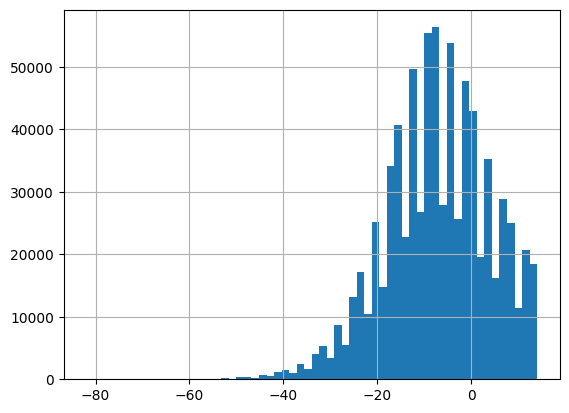

In [92]:
flights[flights['delay_reason'] == 'NO_DELAY']['ARRIVAL_DELAY'].hist(bins=60)

In [93]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED',
       'CANCELLATION_REASON', 'all_delay', 'delay_reason'],
      dtype='object')

In [94]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'delay_reason']]

In [95]:
flights.dtypes

YEAR                    int64
MONTH                   int64
DAY                     int64
DAY_OF_WEEK             int64
AIRLINE                object
SCHEDULED_DEPARTURE     int64
SCHEDULED_ARRIVAL       int64
delay_reason           object
dtype: object

In [96]:
X_flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']]
y_flights = flights[['delay_reason']]

In [97]:
X_flights

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  SCHEDULED_DEPARTURE  \
0        2015      1    1            4      AS                    5   
1        2015      1    1            4      AA                   10   
2        2015      1    1            4      US                   20   
3        2015      1    1            4      AA                   20   
4        2015      1    1            4      AS                   25   
...       ...    ...  ...          ...     ...                  ...   
1048569  2015      3   10            2      DL                 1013   
1048570  2015      3   10            2      EV                 1013   
1048571  2015      3   10            2      UA                 1013   
1048572  2015      3   10            2      UA                 1013   
1048573  2015      3   10            2      EV                 1013   

         SCHEDULED_ARRIVAL  
0                      430  
1                      750  
2                      806  
3                      805  
4                      320  
...                    ...  
1048569               1650  
1048570               1149  
1048571               1337  
1048572               1624  
1048573               1242  

[1005504 rows x 7 columns]

In [98]:
y_flights

delay_reason
0                   NO_DELAY
1                   NO_DELAY
2                   NO_DELAY
3                   NO_DELAY
4                   NO_DELAY
...                      ...
1048569  LATE_AIRCRAFT_DELAY
1048570             NO_DELAY
1048571             NO_DELAY
1048572             NO_DELAY
1048573             NO_DELAY

[1005504 rows x 1 columns]

In [99]:
X_flights = pd.get_dummies(X_flights)
X_flights
# y_flights = pd.get_dummies(y_flights)

YEAR  MONTH  DAY  DAY_OF_WEEK  SCHEDULED_DEPARTURE  \
0        2015      1    1            4                    5   
1        2015      1    1            4                   10   
2        2015      1    1            4                   20   
3        2015      1    1            4                   20   
4        2015      1    1            4                   25   
...       ...    ...  ...          ...                  ...   
1048569  2015      3   10            2                 1013   
1048570  2015      3   10            2                 1013   
1048571  2015      3   10            2                 1013   
1048572  2015      3   10            2                 1013   
1048573  2015      3   10            2                 1013   

         SCHEDULED_ARRIVAL  AIRLINE_AA  AIRLINE_AS  AIRLINE_B6  AIRLINE_DL  \
0                      430       False        True       False       False   
1                      750        True       False       False       False   
2                      806       False       False       False       False   
3                      805        True       False       False       False   
4                      320       False        True       False       False   
...                    ...         ...         ...         ...         ...   
1048569               1650       False       False       False        True   
1048570               1149       False       False       False       False   
1048571               1337       False       False       False       False   
1048572               1624       False       False       False       False   
1048573               1242       False       False       False       False   

         AIRLINE_EV  AIRLINE_F9  AIRLINE_HA  AIRLINE_MQ  AIRLINE_NK  \
0             False       False       False       False       False   
1             False       False       False       False       False   
2             False       False       False       False       False   
3             False       False       False       False       False   
4             False       False       False       False       False   
...             ...         ...         ...         ...         ...   
1048569       False       False       False       False       False   
1048570        True       False       False       False       False   
1048571       False       False       False       False       False   
1048572       False       False       False       False       False   
1048573        True       False       False       False       False   

         AIRLINE_OO  AIRLINE_UA  AIRLINE_US  AIRLINE_VX  AIRLINE_WN  
0             False       False       False       False       False  
1             False       False       False       False       False  
2             False       False        True       False       False  
3             False       False       False       False       False  
4             False       False       False       False       False  
...             ...         ...         ...         ...         ...  
1048569       False       False       False       False       False  
1048570       False       False       False       False       False  
1048571       False        True       False       False       False  
1048572       False        True       False       False       False  
1048573       False       False       False       False       False  

[1005504 rows x 20 columns]

In [100]:
flights.head(10)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  SCHEDULED_DEPARTURE  \
0  2015      1    1            4      AS                    5   
1  2015      1    1            4      AA                   10   
2  2015      1    1            4      US                   20   
3  2015      1    1            4      AA                   20   
4  2015      1    1            4      AS                   25   
5  2015      1    1            4      DL                   25   
6  2015      1    1            4      NK                   25   
7  2015      1    1            4      US                   30   
8  2015      1    1            4      AA                   30   
9  2015      1    1            4      DL                   30   

   SCHEDULED_ARRIVAL delay_reason  
0                430     NO_DELAY  
1                750     NO_DELAY  
2                806     NO_DELAY  
3                805     NO_DELAY  
4                320     NO_DELAY  
5                602     NO_DELAY  
6                526     NO_DELAY  
7                803     NO_DELAY  
8                545     NO_DELAY  
9                711     NO_DELAY

In [101]:
X_flights.shape, y_flights.shape

((1005504, 20), (1005504, 1))

In [102]:
y_flights.value_counts()

delay_reason       
NO_DELAY               776976
LATE_AIRCRAFT_DELAY     87438
AIR_SYSTEM_DELAY        66816
AIRLINE_DELAY           65052
WEATHER_DELAY            8931
SECURITY_DELAY            291
Name: count, dtype: int64

In [103]:
X_flights = X_flights.astype(int)
X_flights

YEAR  MONTH  DAY  DAY_OF_WEEK  SCHEDULED_DEPARTURE  \
0        2015      1    1            4                    5   
1        2015      1    1            4                   10   
2        2015      1    1            4                   20   
3        2015      1    1            4                   20   
4        2015      1    1            4                   25   
...       ...    ...  ...          ...                  ...   
1048569  2015      3   10            2                 1013   
1048570  2015      3   10            2                 1013   
1048571  2015      3   10            2                 1013   
1048572  2015      3   10            2                 1013   
1048573  2015      3   10            2                 1013   

         SCHEDULED_ARRIVAL  AIRLINE_AA  AIRLINE_AS  AIRLINE_B6  AIRLINE_DL  \
0                      430           0           1           0           0   
1                      750           1           0           0           0   
2                      806           0           0           0           0   
3                      805           1           0           0           0   
4                      320           0           1           0           0   
...                    ...         ...         ...         ...         ...   
1048569               1650           0           0           0           1   
1048570               1149           0           0           0           0   
1048571               1337           0           0           0           0   
1048572               1624           0           0           0           0   
1048573               1242           0           0           0           0   

         AIRLINE_EV  AIRLINE_F9  AIRLINE_HA  AIRLINE_MQ  AIRLINE_NK  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1048569           0           0           0           0           0   
1048570           1           0           0           0           0   
1048571           0           0           0           0           0   
1048572           0           0           0           0           0   
1048573           1           0           0           0           0   

         AIRLINE_OO  AIRLINE_UA  AIRLINE_US  AIRLINE_VX  AIRLINE_WN  
0                 0           0           0           0           0  
1                 0           0           0           0           0  
2                 0           0           1           0           0  
3                 0           0           0           0           0  
4                 0           0           0           0           0  
...             ...         ...         ...         ...         ...  
1048569           0           0           0           0           0  
1048570           0           0           0           0           0  
1048571           0           1           0           0           0  
1048572           0           1           0           0           0  
1048573           0           0           0           0           0  

[1005504 rows x 20 columns]

# Model training with Scikit-learn

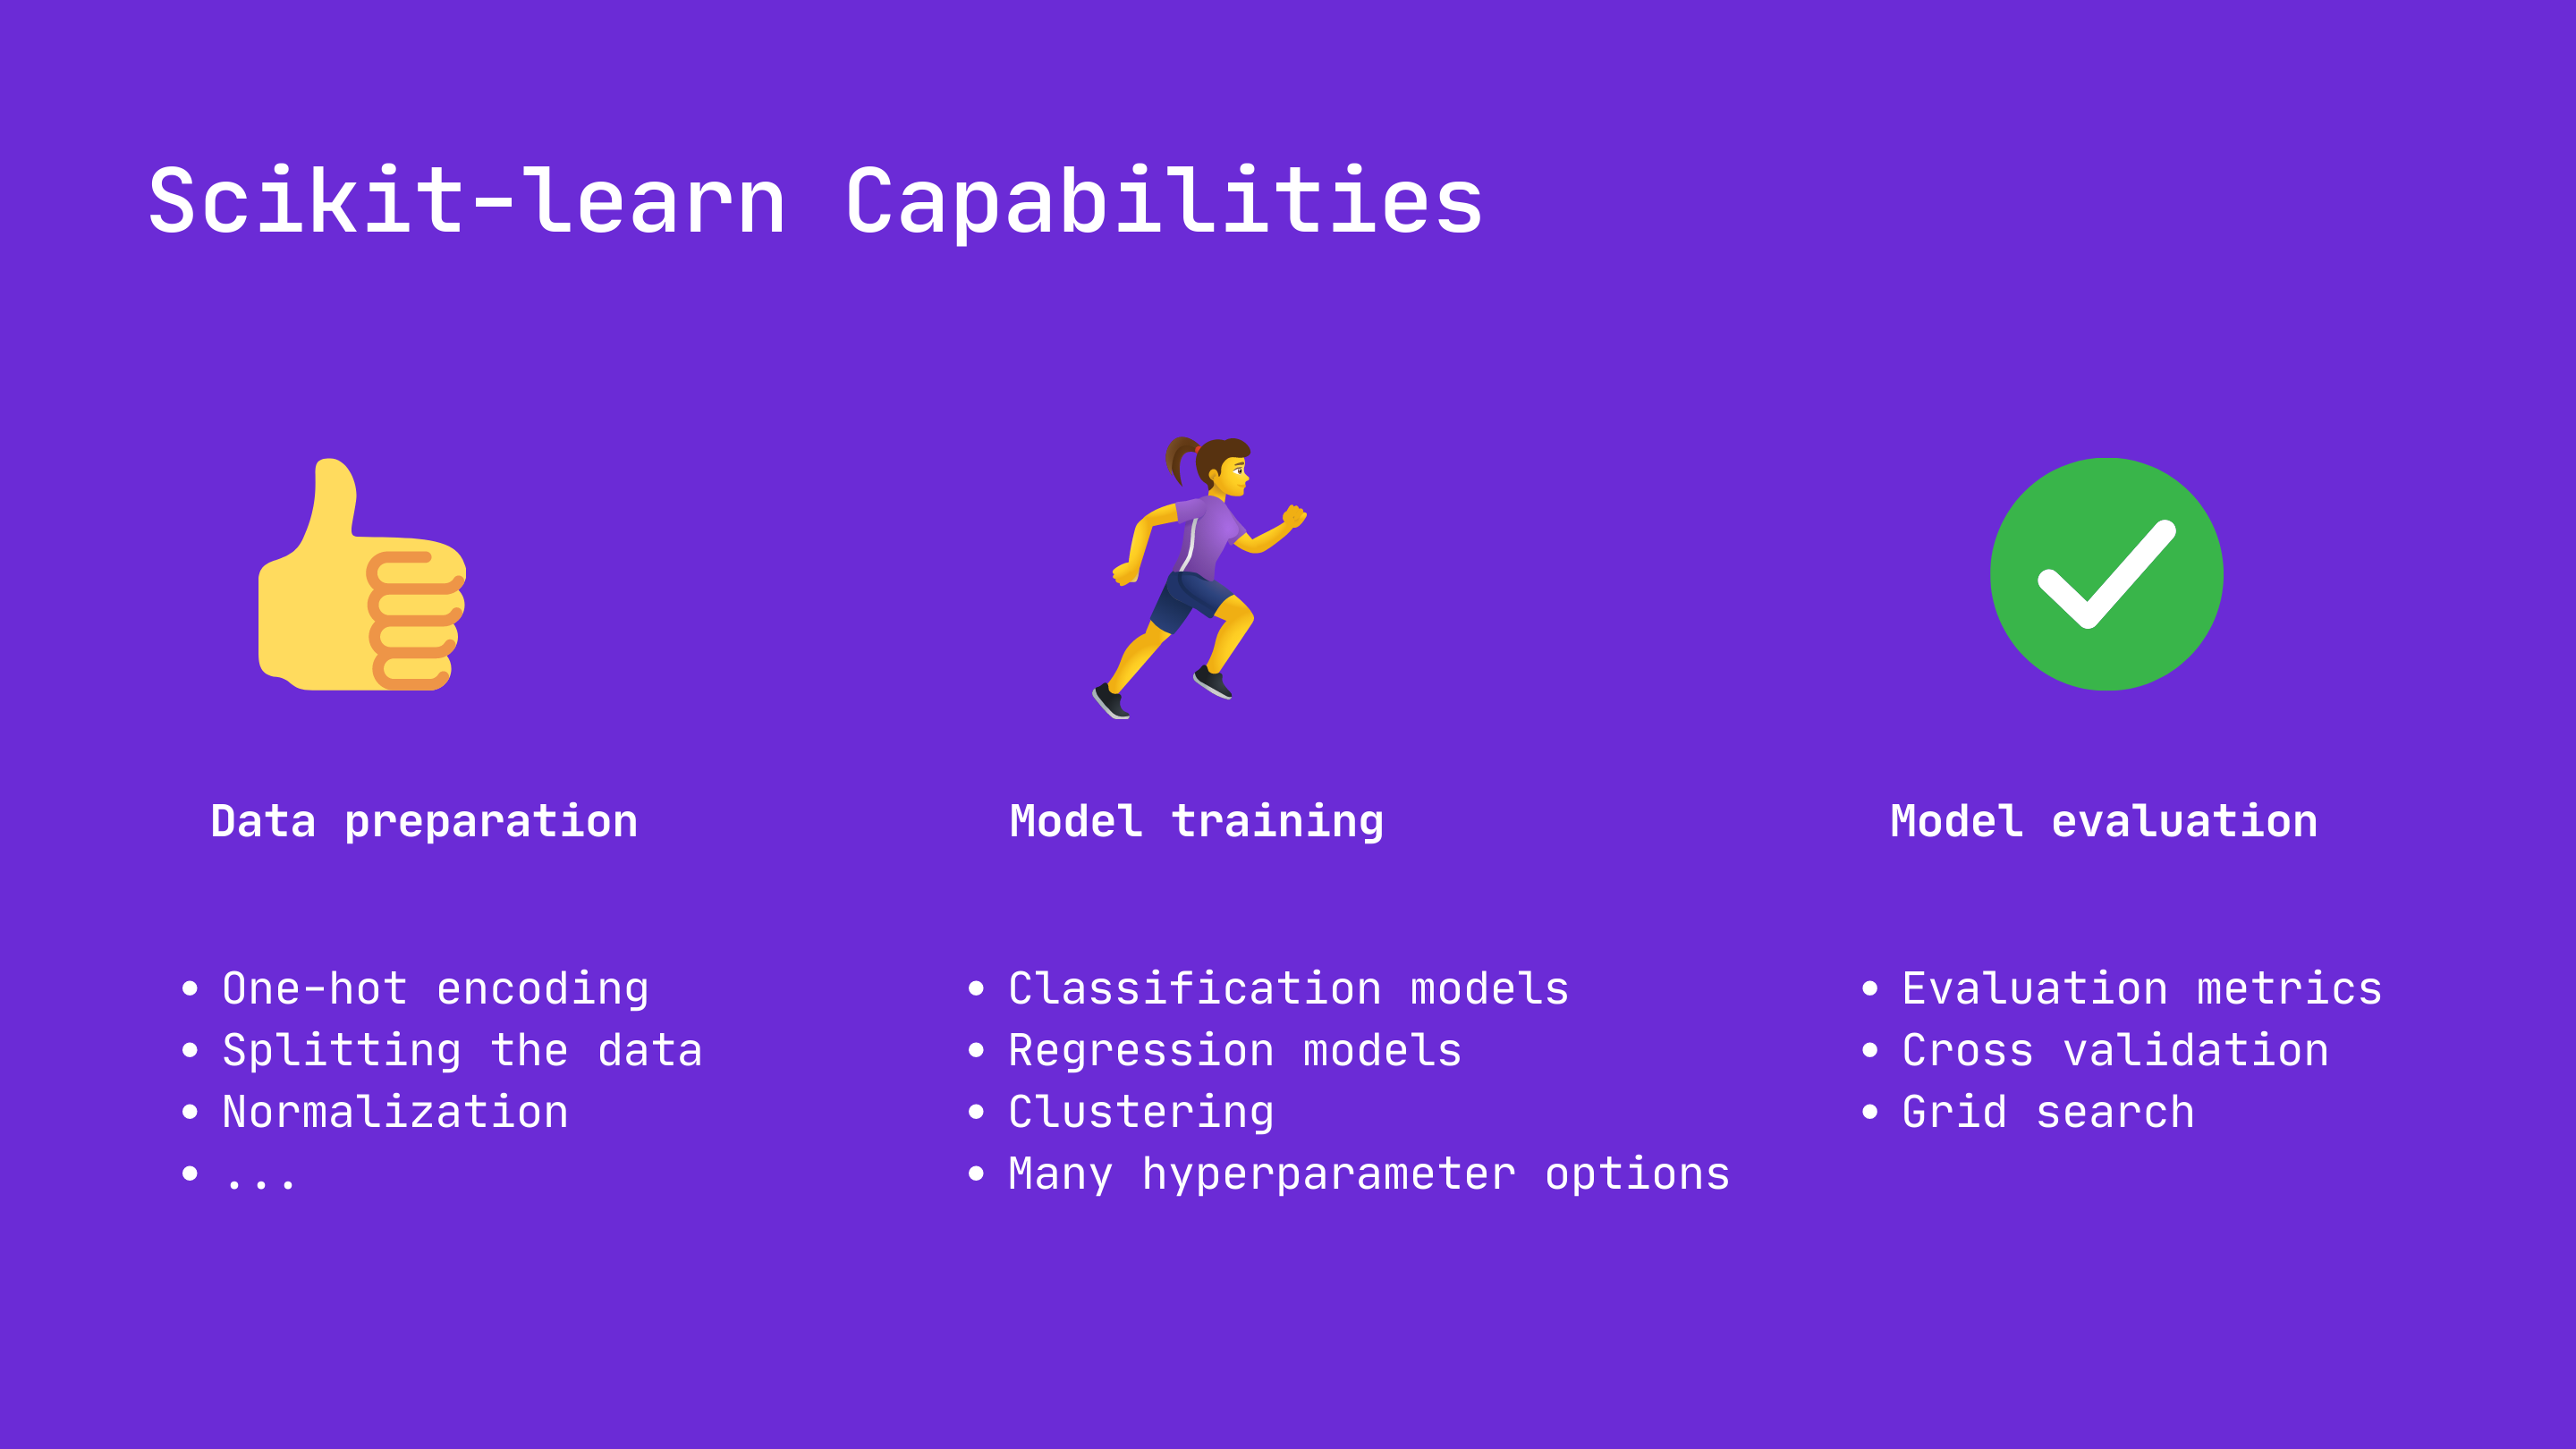

# Importing data

In [ ]:
# # https://scikit-learn.org/stable/datasets/toy_dataset.html

# from sklearn.datasets import load_iris
# data = load_iris()

# data

# # https://scikit-learn.org/stable/datasets/real_world.html


In [ ]:
# from sklearn.datasets import fetch_20newsgroups
# newsgroups_train = fetch_20newsgroups()

In [ ]:
# newsgroups_train

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

# Splitting into train and test datasets

In [104]:
y_flights.value_counts()

delay_reason       
NO_DELAY               776976
LATE_AIRCRAFT_DELAY     87438
AIR_SYSTEM_DELAY        66816
AIRLINE_DELAY           65052
WEATHER_DELAY            8931
SECURITY_DELAY            291
Name: count, dtype: int64

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_flights, y_flights, test_size=0.30, random_state=15)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flights, y_flights, test_size=0.15, random_state=15)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=15)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(683742, 20)
(150826, 20)
(683742, 1)
(150826, 1)


In [108]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(683742, 20)
(170936, 20)
(150826, 20)


## Dealing with unbalanced data

In [109]:
pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]

Note: you may need to restart the kernel to use updated packages.


In [110]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
print("imbalanced-learn is ready to use!")

imbalanced-learn is ready to use!


In [111]:
y_flights.value_counts()

delay_reason       
NO_DELAY               776976
LATE_AIRCRAFT_DELAY     87438
AIR_SYSTEM_DELAY        66816
AIRLINE_DELAY           65052
WEATHER_DELAY            8931
SECURITY_DELAY            291
Name: count, dtype: int64

In [112]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [114]:
y_flights.value_counts()

delay_reason       
NO_DELAY               776976
LATE_AIRCRAFT_DELAY     87438
AIR_SYSTEM_DELAY        66816
AIRLINE_DELAY           65052
WEATHER_DELAY            8931
SECURITY_DELAY            291
Name: count, dtype: int64

In [113]:
y_resampled.value_counts()

delay_reason       
AIRLINE_DELAY          528521
AIR_SYSTEM_DELAY       528521
LATE_AIRCRAFT_DELAY    528521
NO_DELAY               528521
SECURITY_DELAY         528521
WEATHER_DELAY          528521
Name: count, dtype: int64

# Training

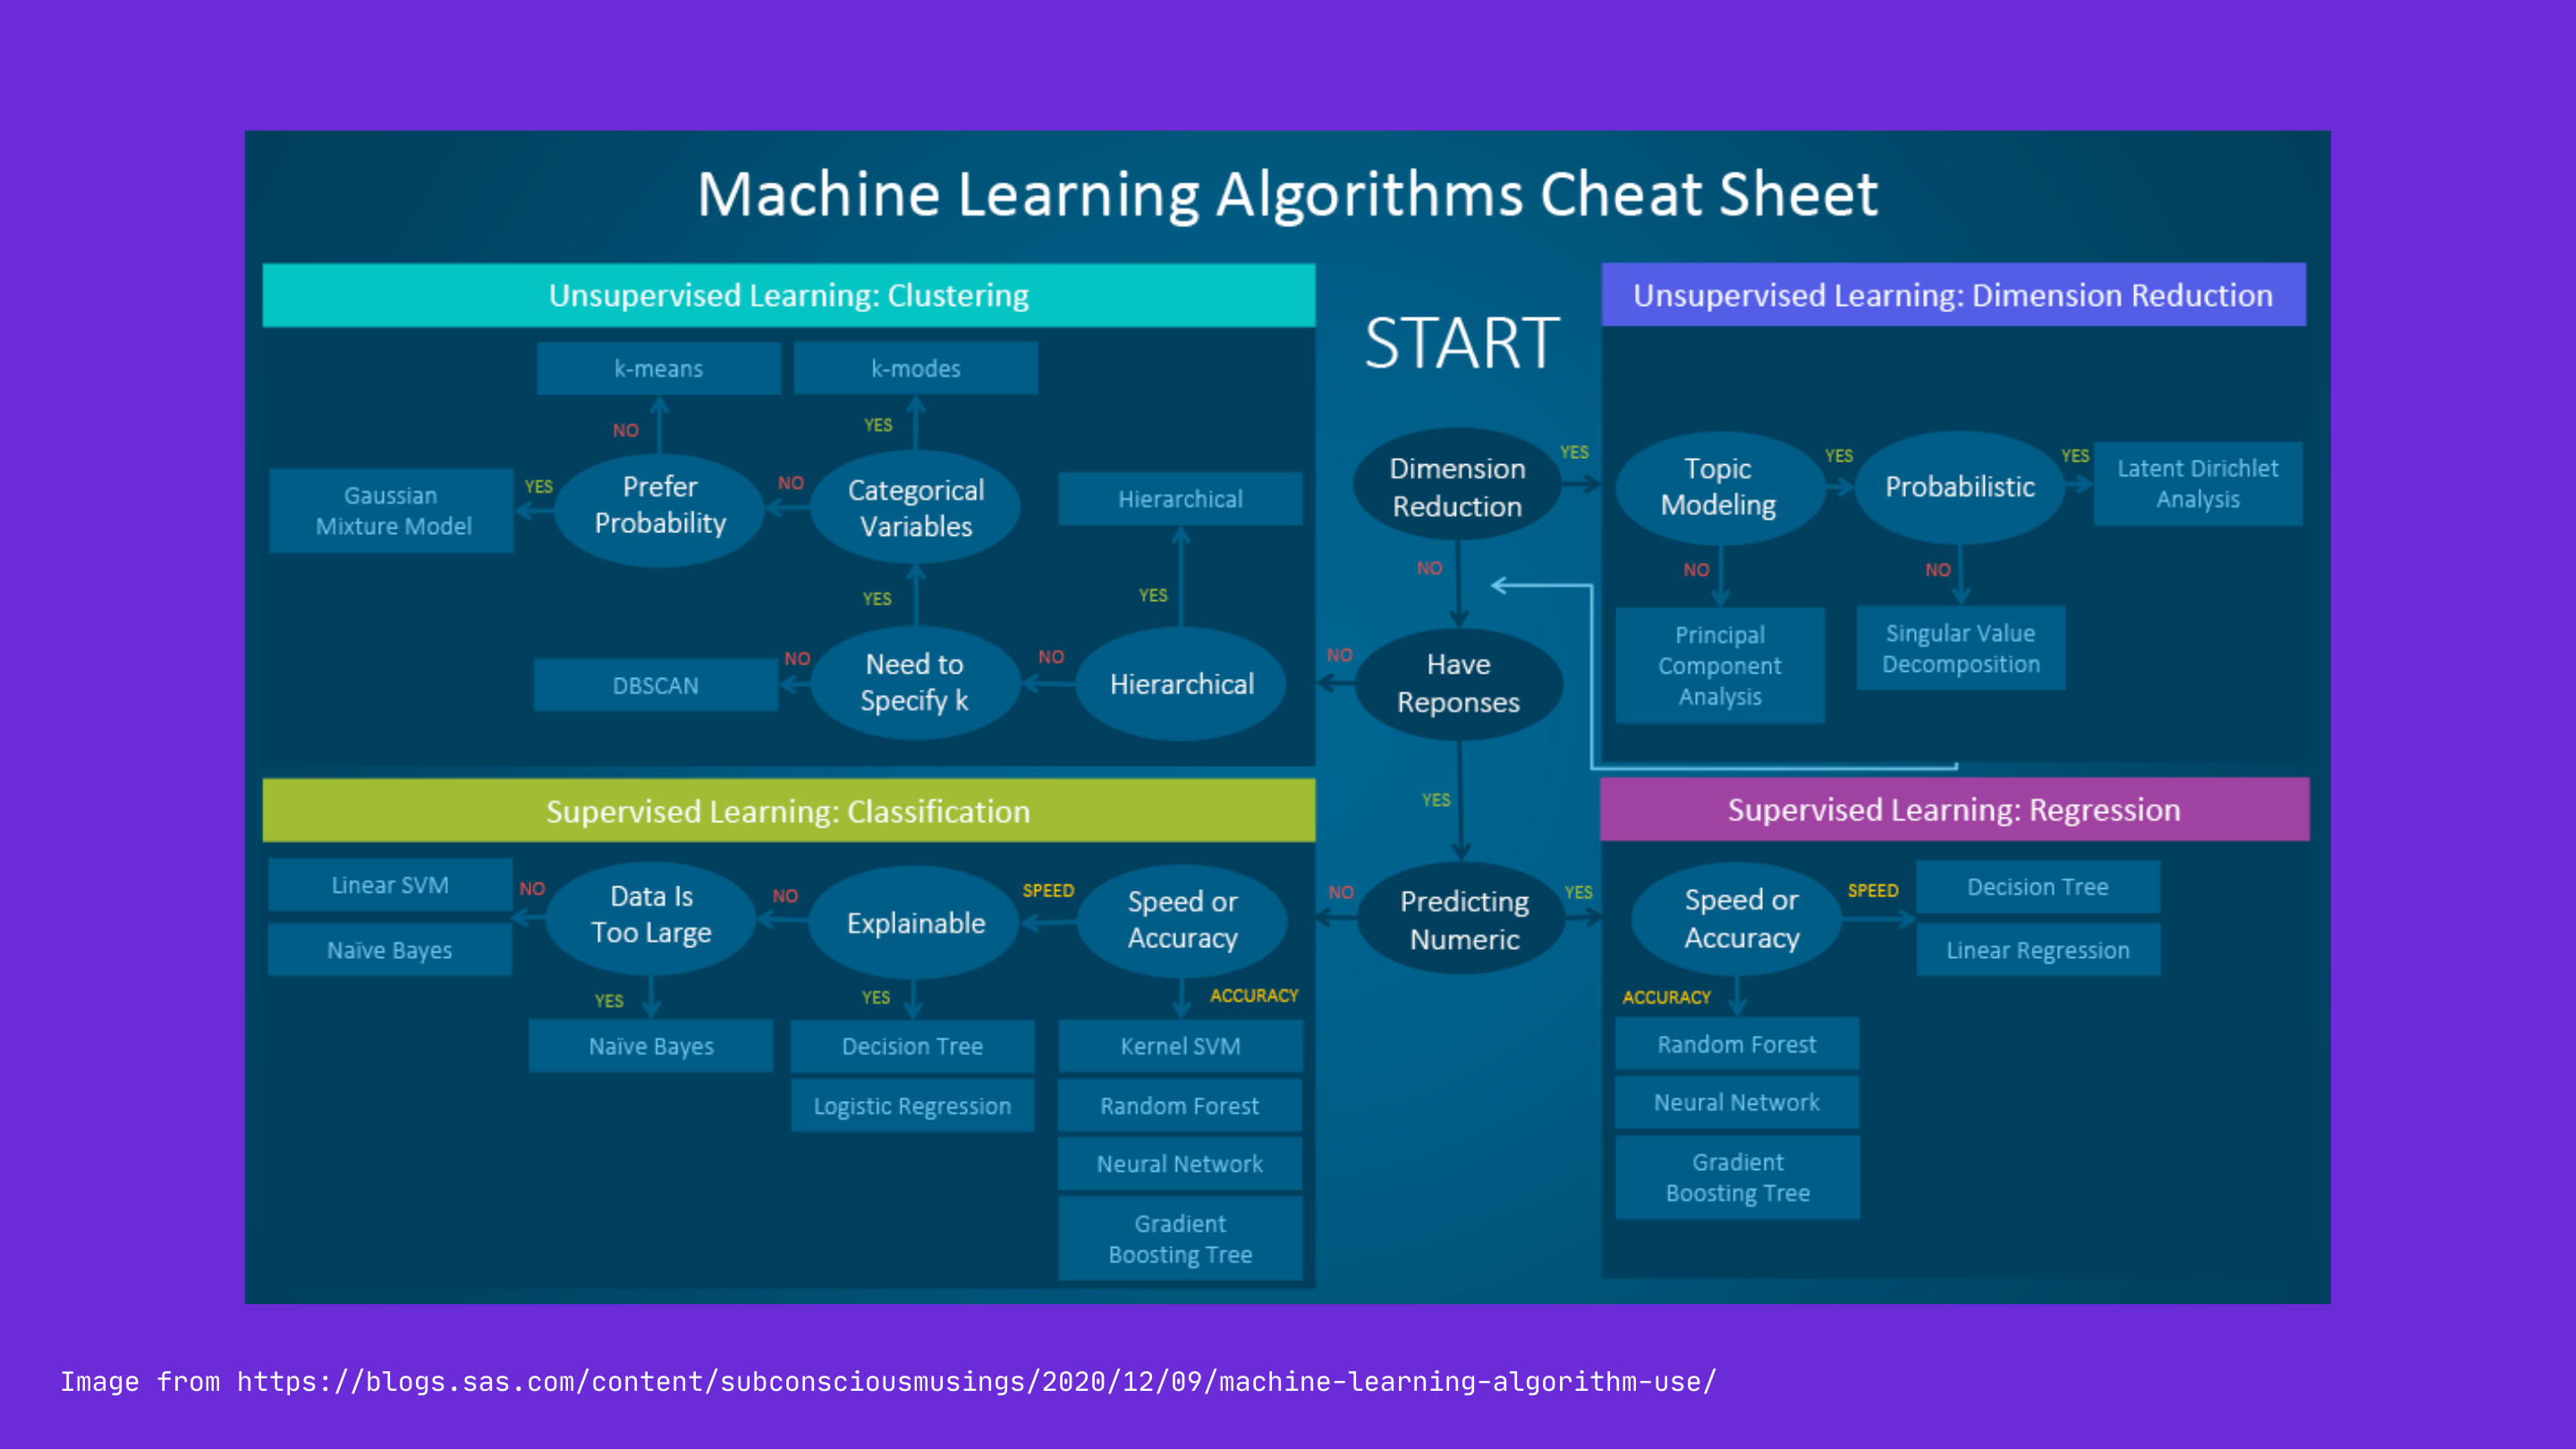

In [115]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

clf.fit(X_resampled, y_resampled)


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [116]:
y_pred = clf.predict(X_test)
y_pred

array(['LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'NO_DELAY', ...,
       'NO_DELAY', 'AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY'],
      shape=(150826,), dtype=object)

In [117]:
clf.score(X_test, y_test)

0.336327954066275

In [2]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


NameError: name 'y_test' is not defined

In [1]:
y_test.columns

NameError: name 'y_test' is not defined

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[ 1533,  1507,  2842,  1909,   351,  1643],
       [  966,  2659,  2359,  1790,   362,  1817],
       [ 1500,  1418,  6207,  1608,   481,  2018],
       [12249, 17262, 26531, 39764,  4007, 16599],
       [    6,    11,     9,     7,     1,     3],
       [  129,   217,   265,   185,    48,   563]])

# Evaluation


In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)


In [58]:
cm

array([[27025, 16072, 24155, 24182,   117,  1754],
       [15965, 35944, 19541, 17219,   134,  2209],
       [23568, 19294, 55096, 22491,   122,  2540],
       [23051, 17094, 23172, 39607,   138,  1387],
       [  164,    89,   112,   132,    39,    13],
       [ 1720,  2488,  2545,  1441,    12,  2402]])

<AxesSubplot:>

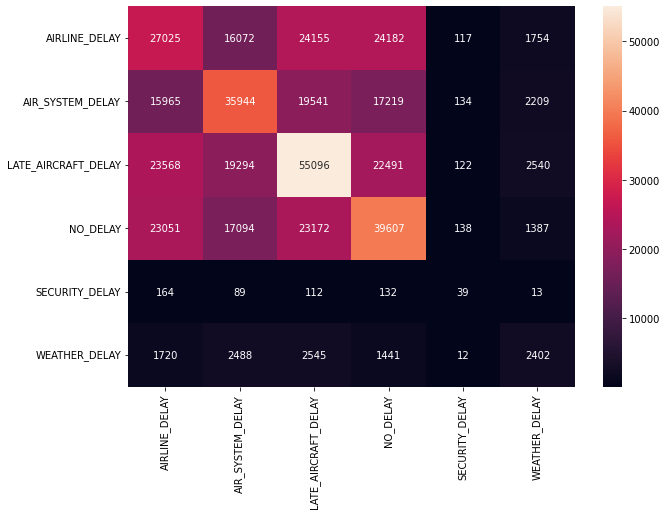

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.30      0.29      0.29     93305
   AIR_SYSTEM_DELAY       0.40      0.39      0.40     91012
LATE_AIRCRAFT_DELAY       0.44      0.45      0.44    123111
           NO_DELAY       0.38      0.38      0.38    104449
     SECURITY_DELAY       0.07      0.07      0.07       549
      WEATHER_DELAY       0.23      0.23      0.23     10608

           accuracy                           0.38    423034
          macro avg       0.30      0.30      0.30    423034
       weighted avg       0.38      0.38      0.38    423034



# Grid search

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'max_depth':[10,15], 'max_features':["sqrt", "log2"]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15],
                         'max_features': ['sqrt', 'log2']})

In [64]:
y_pred = clf.predict(X_test)
y_pred

array(['LATE_AIRCRAFT_DELAY', 'NO_DELAY', 'LATE_AIRCRAFT_DELAY', ...,
       'LATE_AIRCRAFT_DELAY', 'LATE_AIRCRAFT_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

In [67]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.24      0.02      0.04     93305
   AIR_SYSTEM_DELAY       0.30      0.06      0.09     91012
LATE_AIRCRAFT_DELAY       0.36      0.80      0.50    123111
           NO_DELAY       0.34      0.41      0.37    104449
     SECURITY_DELAY       0.00      0.00      0.00       549
      WEATHER_DELAY       0.02      0.00      0.00     10608

           accuracy                           0.35    423034
          macro avg       0.21      0.21      0.17    423034
       weighted avg       0.31      0.35      0.27    423034



# Or just use cross validation

In [48]:
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
cross_val_score(clf, X_flights, y_flights, cv=10)

array([0.316, 0.32 , 0.326, 0.267, 0.226, 0.28 , 0.339, 0.36 , 0.329,
       0.296])

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
cross_val_score(clf, X_flights, y_flights, cv=10)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)
cross_val_score(clf, X_flights, y_flights, cv=10)